#  Unit 4.3a Parallel Computing
> Observe an algorithm using parallel computing in Python Code.  Monitor processes on host.
- toc: true
- image: /images/python.png
- categories: []
- type: ap
- week: 28

## Analyzing Parallel Computing
> Once again we will use image lab, this time to review Parallel Computing.
- Change baseWidth in this line in code to increase computation requirements: ```def process_image(image, baseWidth=512):```  For instance 320, 512, 1024, 2048, 4096.
- Compare Sequential and Parallel computing code and time to achieve outputs

In [10]:
from IPython.display import HTML, display
from pathlib import Path  # https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f
from PIL import Image as pilImage # as PIL Image is used to avoid conflicts
from io import BytesIO
import base64
import numpy as np

# prepares a series of images
def image_data(path=Path("images/"), images=None):  # path of static images is defaulted
    if images is None:  # default image
        images = [
            {'source': "Internet", 'label': "Green Square", 'file': "green-square-16.png"},
            {'source': "Peter Carolin", 'label': "Clouds Impression", 'file': "clouds-impression.png"},
            {'source': "Peter Carolin", 'label': "Lassen Volcano", 'file': "lassen-volcano.jpg"}
        ]
    for image in images:
        # File to open
        image['filename'] = path / image['file']  # file with path
    return images

# Scale to baseWidth
def scale_image(img, baseWidth):
    scalePercent = (baseWidth/float(img.size[0]))
    scaleHeight = int((float(img.size[1])*float(scalePercent)))
    scale = (baseWidth, scaleHeight)
    return img.resize(scale)

# PIL image converted to base64
def image_to_base64(img, format):
    with BytesIO() as buffer:
        img.save(buffer, format)
        return base64.b64encode(buffer.getvalue()).decode()
    
# Convert pixels to Grey Scale
def grey_pixel(pixel):
    average = (pixel[0] + pixel[1] + pixel[2]) // 3  # average pixel values and use // for integer division
    if len(pixel) > 3:
        return( (average, average, average, pixel[3]) ) # PNG format
    else:
        return( (average, average, average) )
    
# Convert pixels to Red Scale
def red_pixel(pixel):
    if len(pixel) > 3:
        return( (pixel[0], 0, 0, pixel[3]) ) # PNG format
    else:
        return( (pixel[0], 0, 0) )
    
# Convert pixels to Red Scale
def green_pixel(pixel):
    if len(pixel) > 3:
        return( (0, pixel[1], 0, pixel[3]) ) # PNG format
    else:
        return( (0, pixel[1], 0) )
    
# Convert pixels to Red Scale
def blue_pixel(pixel):
    if len(pixel) > 3:
        return( (0, 0, pixel[2], pixel[3]) ) # PNG format
    else:
        return( (0, 0, pixel[2]) )
        
# Set Properties of Image, Scale, and convert to Base64
def image_management(image, baseWidth):  # path of static images is defaulted        
    # Image open return PIL image object
    img = pilImage.open(image['filename'])
    
    # Python Image Library operations
    image['format'] = img.format
    image['mode'] = img.mode
    image['size'] = img.size
    # Scale the Image
    img = scale_image(img, baseWidth)
    image['pil'] = img
    image['scaled_size'] = img.size
    image['numpy'] = np.array(img.getdata())
    # Scaled HTML
    image['html'] = '<img src="data:image/png;base64,%s">' % image_to_base64(image['pil'], image['format'])
    
    # Grey HTML
    # each pixel in numpy array is turned to grey 
    # then resulting list, using List Comprehension, is put back into img    
    img.putdata([grey_pixel(pixel) for pixel in image['numpy']])
    image['html_grey'] =  '<img src="data:image/png;base64,%s">' % image_to_base64(img, image['format'])
    
    # Red HTML
    img.putdata([red_pixel(pixel) for pixel in image['numpy']])
    image['html_red'] =  '<img src="data:image/png;base64,%s">' % image_to_base64(img, image['format'])
    
    # Green HTML
    img.putdata([green_pixel(pixel) for pixel in image['numpy']])
    image['html_green'] =  '<img src="data:image/png;base64,%s">' % image_to_base64(img, image['format'])
    
    # Blue HTML
    img.putdata([blue_pixel(pixel) for pixel in image['numpy']])
    image['html_blue'] =  '<img src="data:image/png;base64,%s">' % image_to_base64(img, image['format'])
    
    
def process_image(image, baseWidth=2000):
    image_management(image, baseWidth)
    print("---- meta data -----")
    print(image['label'])
    print(image['source'])
    print(image['format'])
    print(image['mode'])
    print("Original size: ", image['size'])
    print("Scaled size: ", image['scaled_size'])
    
    print("-- images --")
    display(HTML(image['html'])) 
    display(HTML(image['html_grey'])) 
    display(HTML(image['html_red'])) 
    display(HTML(image['html_green'])) 
    display(HTML(image['html_blue'])) 


## Sequential Processing 
> The for loop iterates over the list of images and processes them one at a time, in order.

> Sequential - going through a sequence.

## Parallel Computing

 > In parallel or concurrent mode, the ThreadPoolExecutor is used to submit each image to a separate worker thread, allowing multiple images to be processed simultaneously. Multithreading allows multiple concurrent tasks of a process at the same time. The executor.map() method is used to apply the process_image function to each image in the images list.  
 - The order in which the images are processed is not guaranteed, as threads are performed simultaneously.

---- meta data -----
Lassen Volcano
Peter Carolin
JPEG
RGB
Original size:  (2792, 2094)
Scaled size:  (2000, 1500)
-- images --



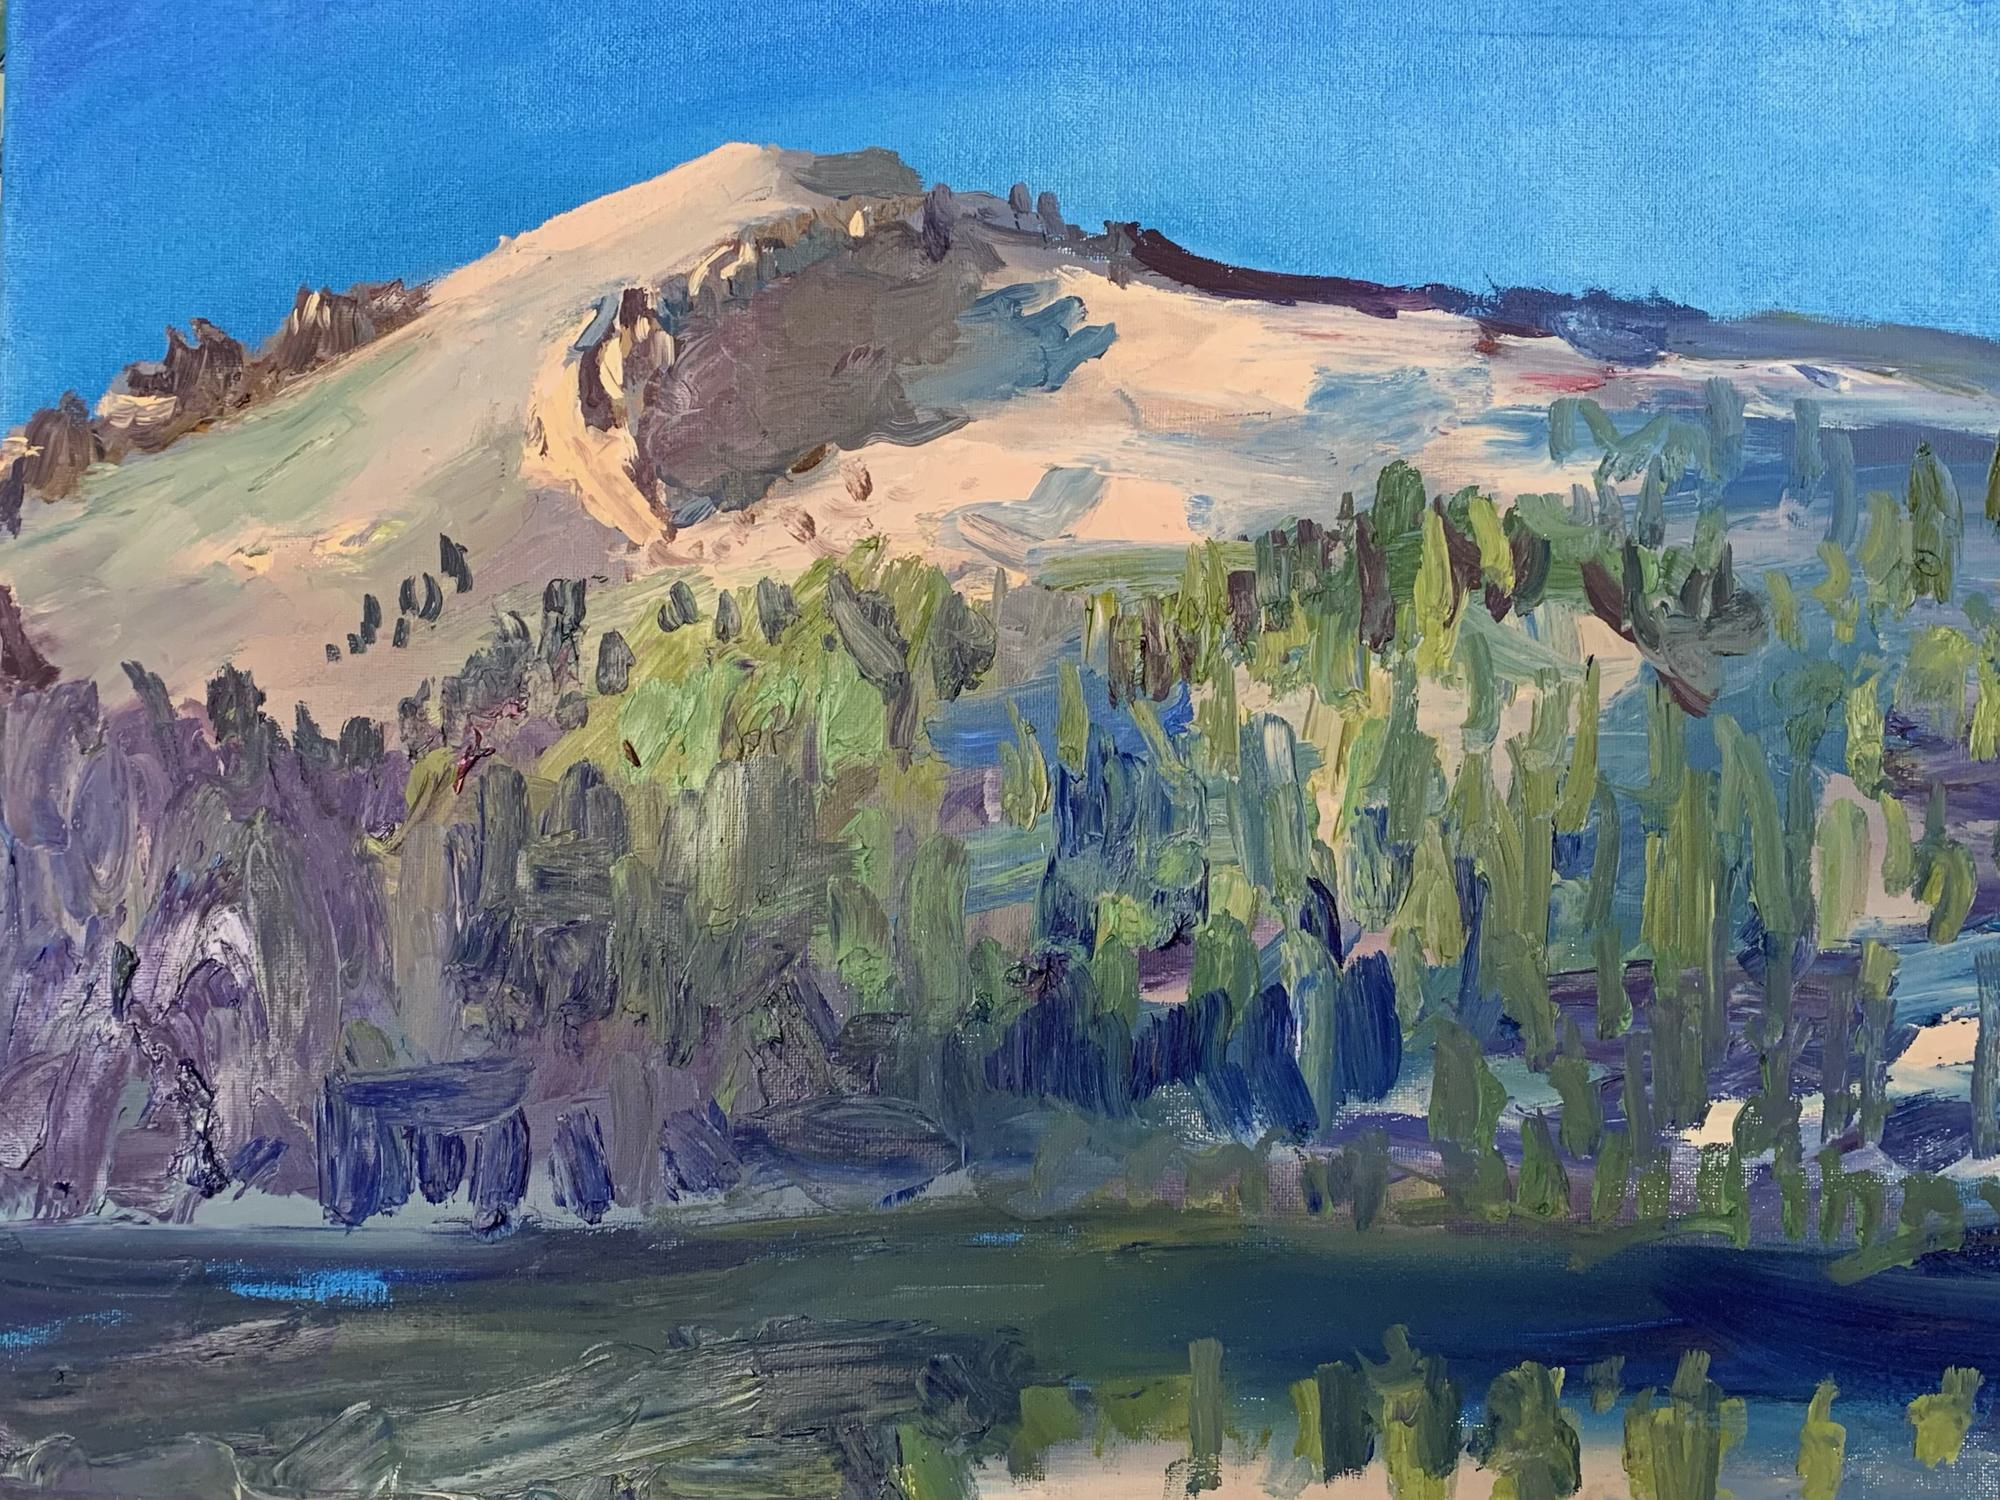


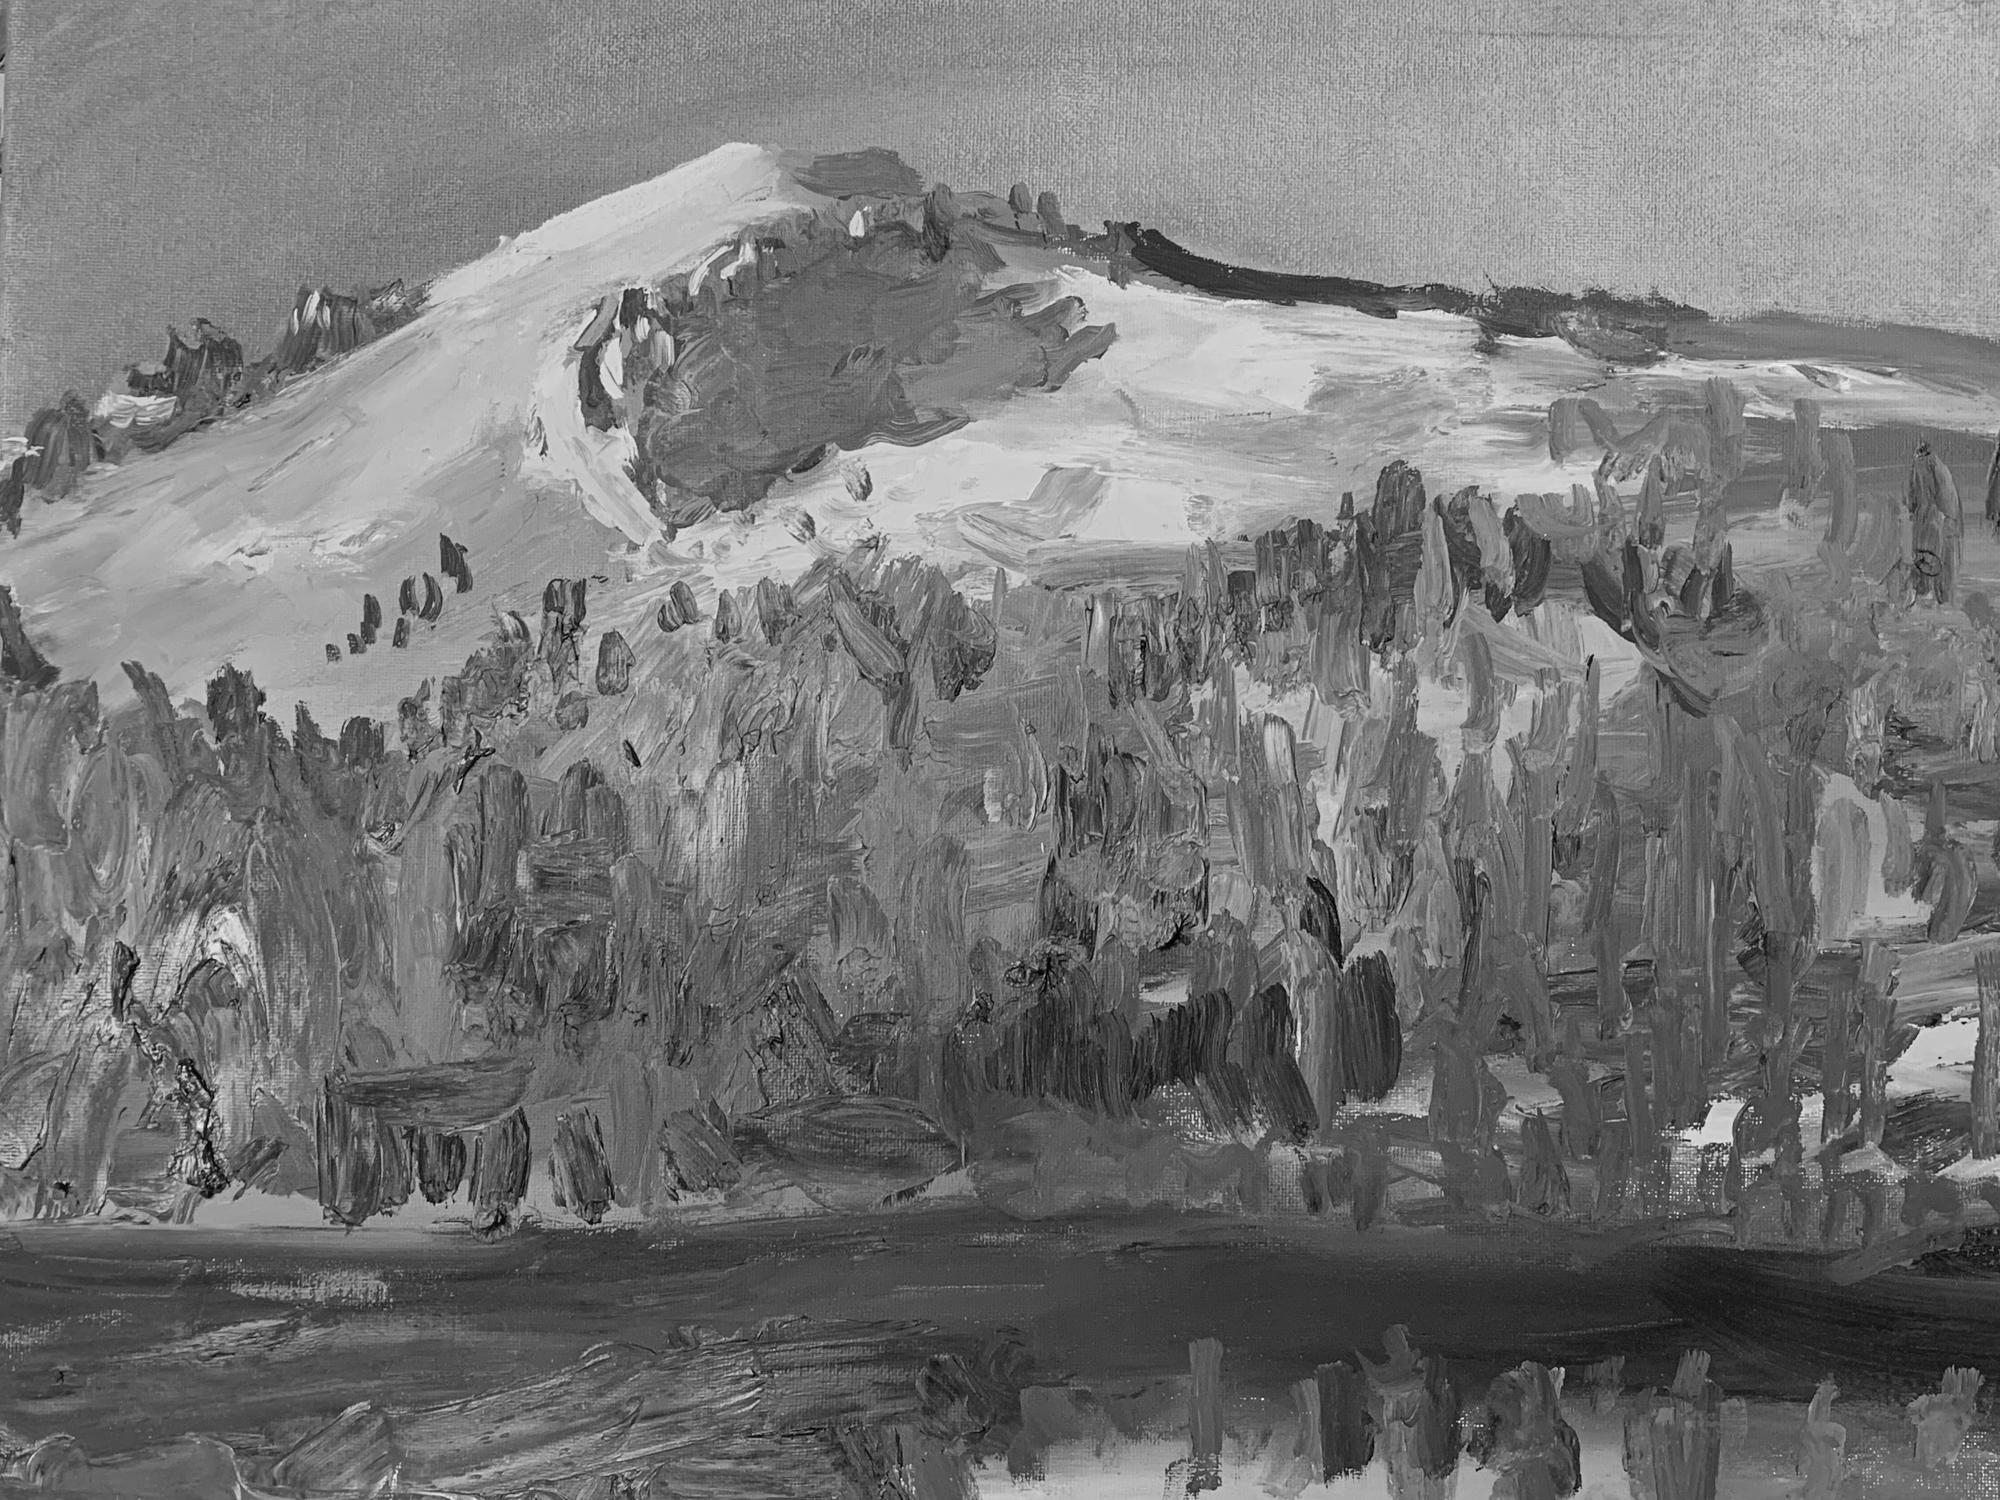


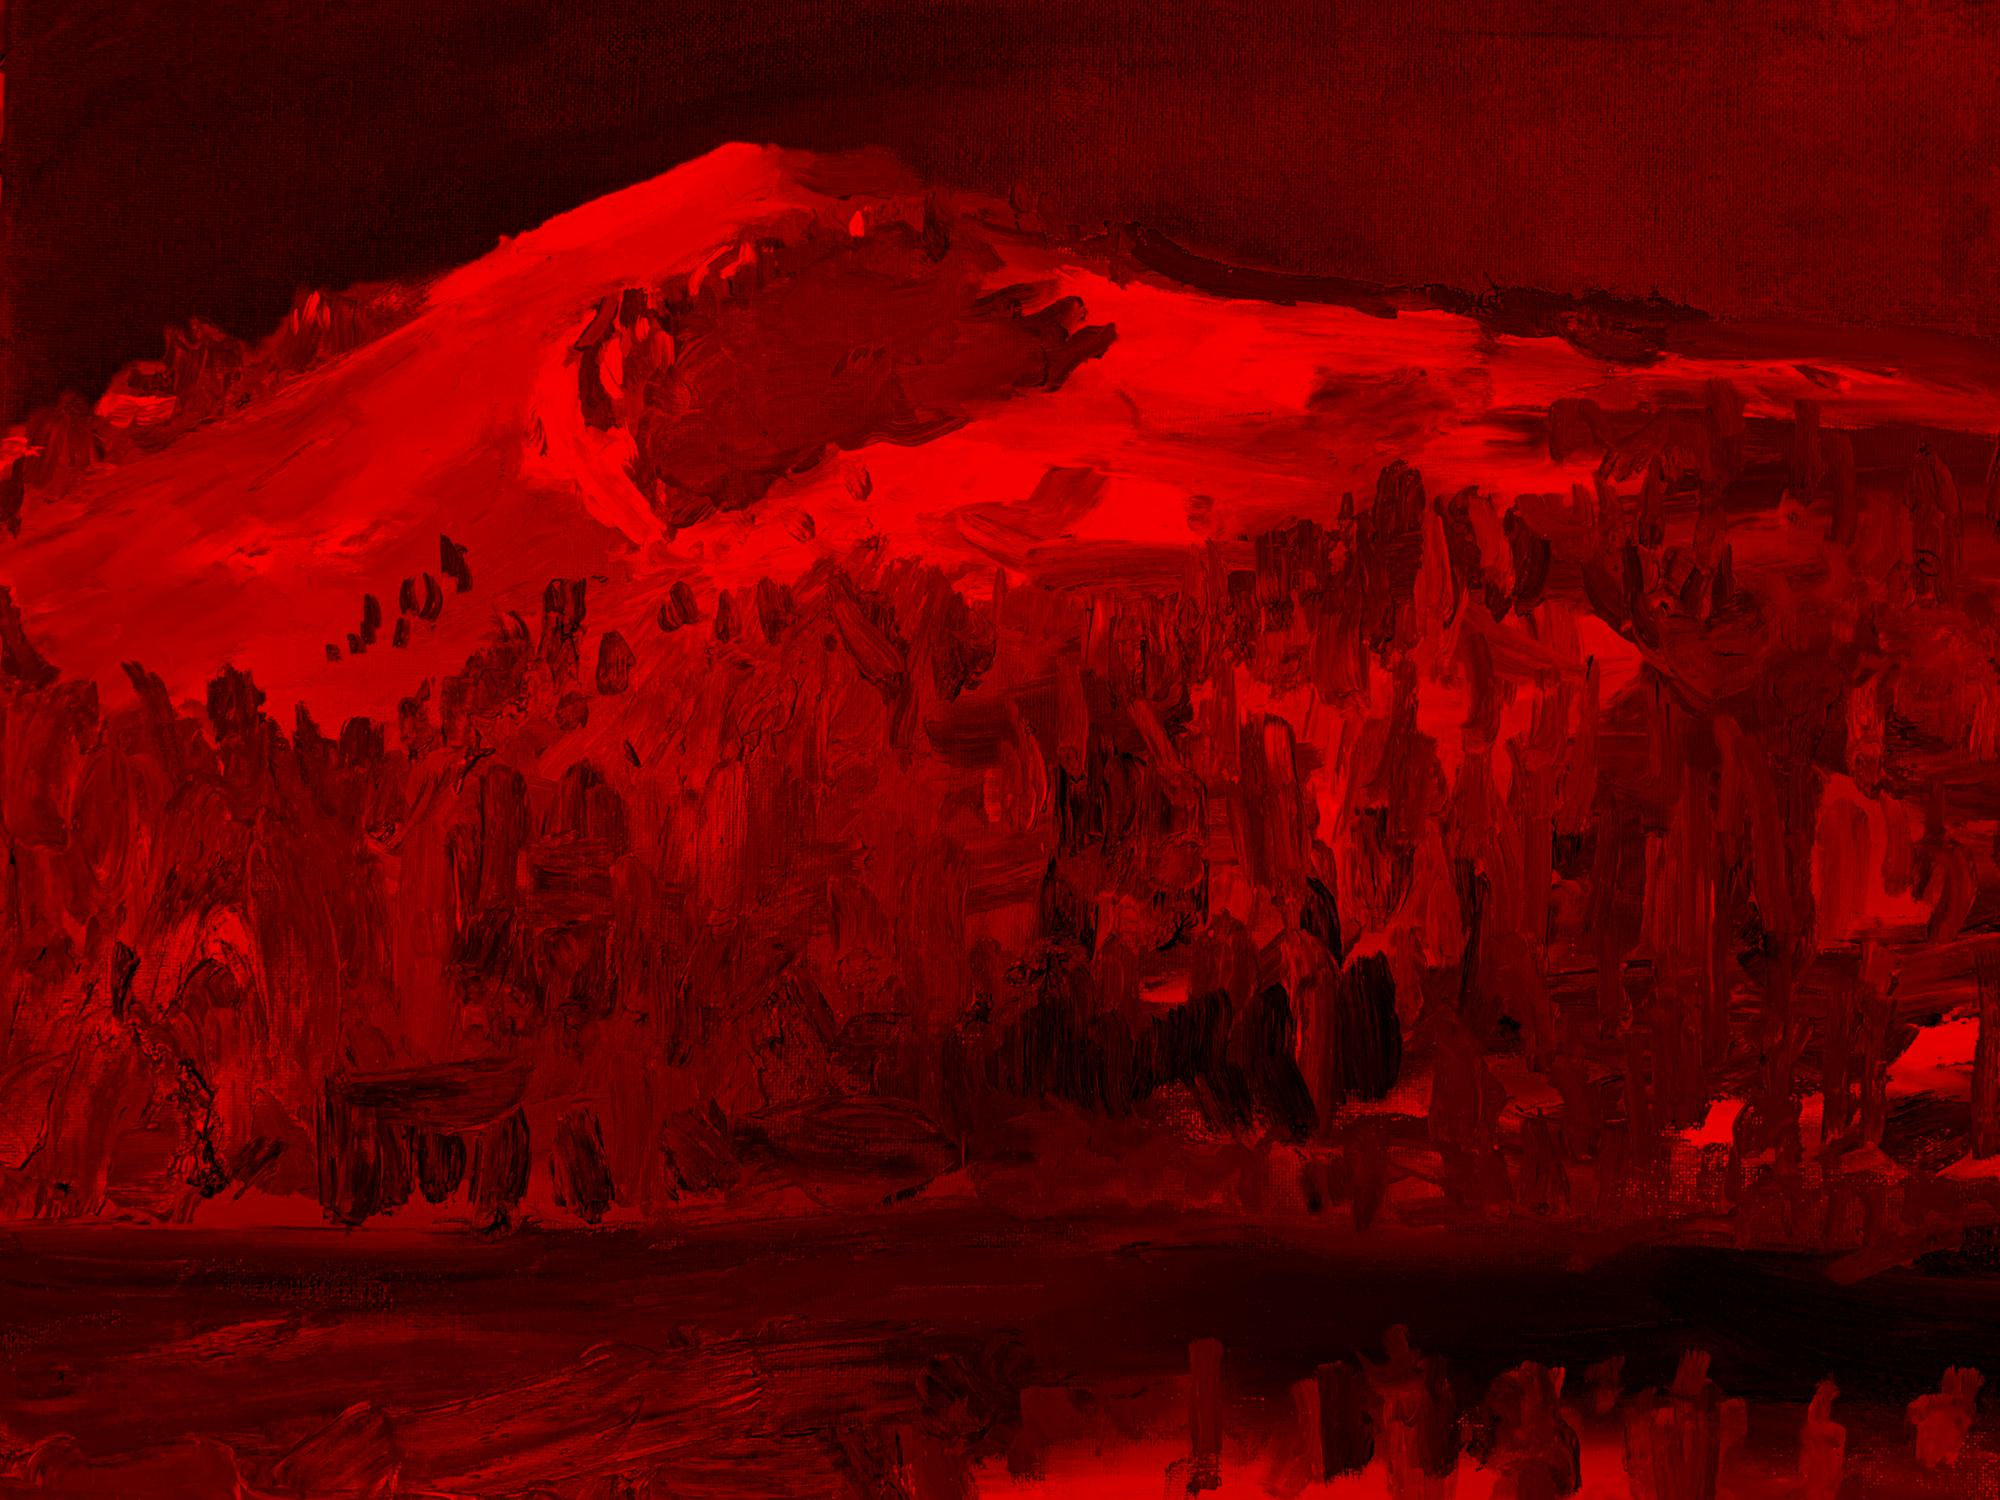


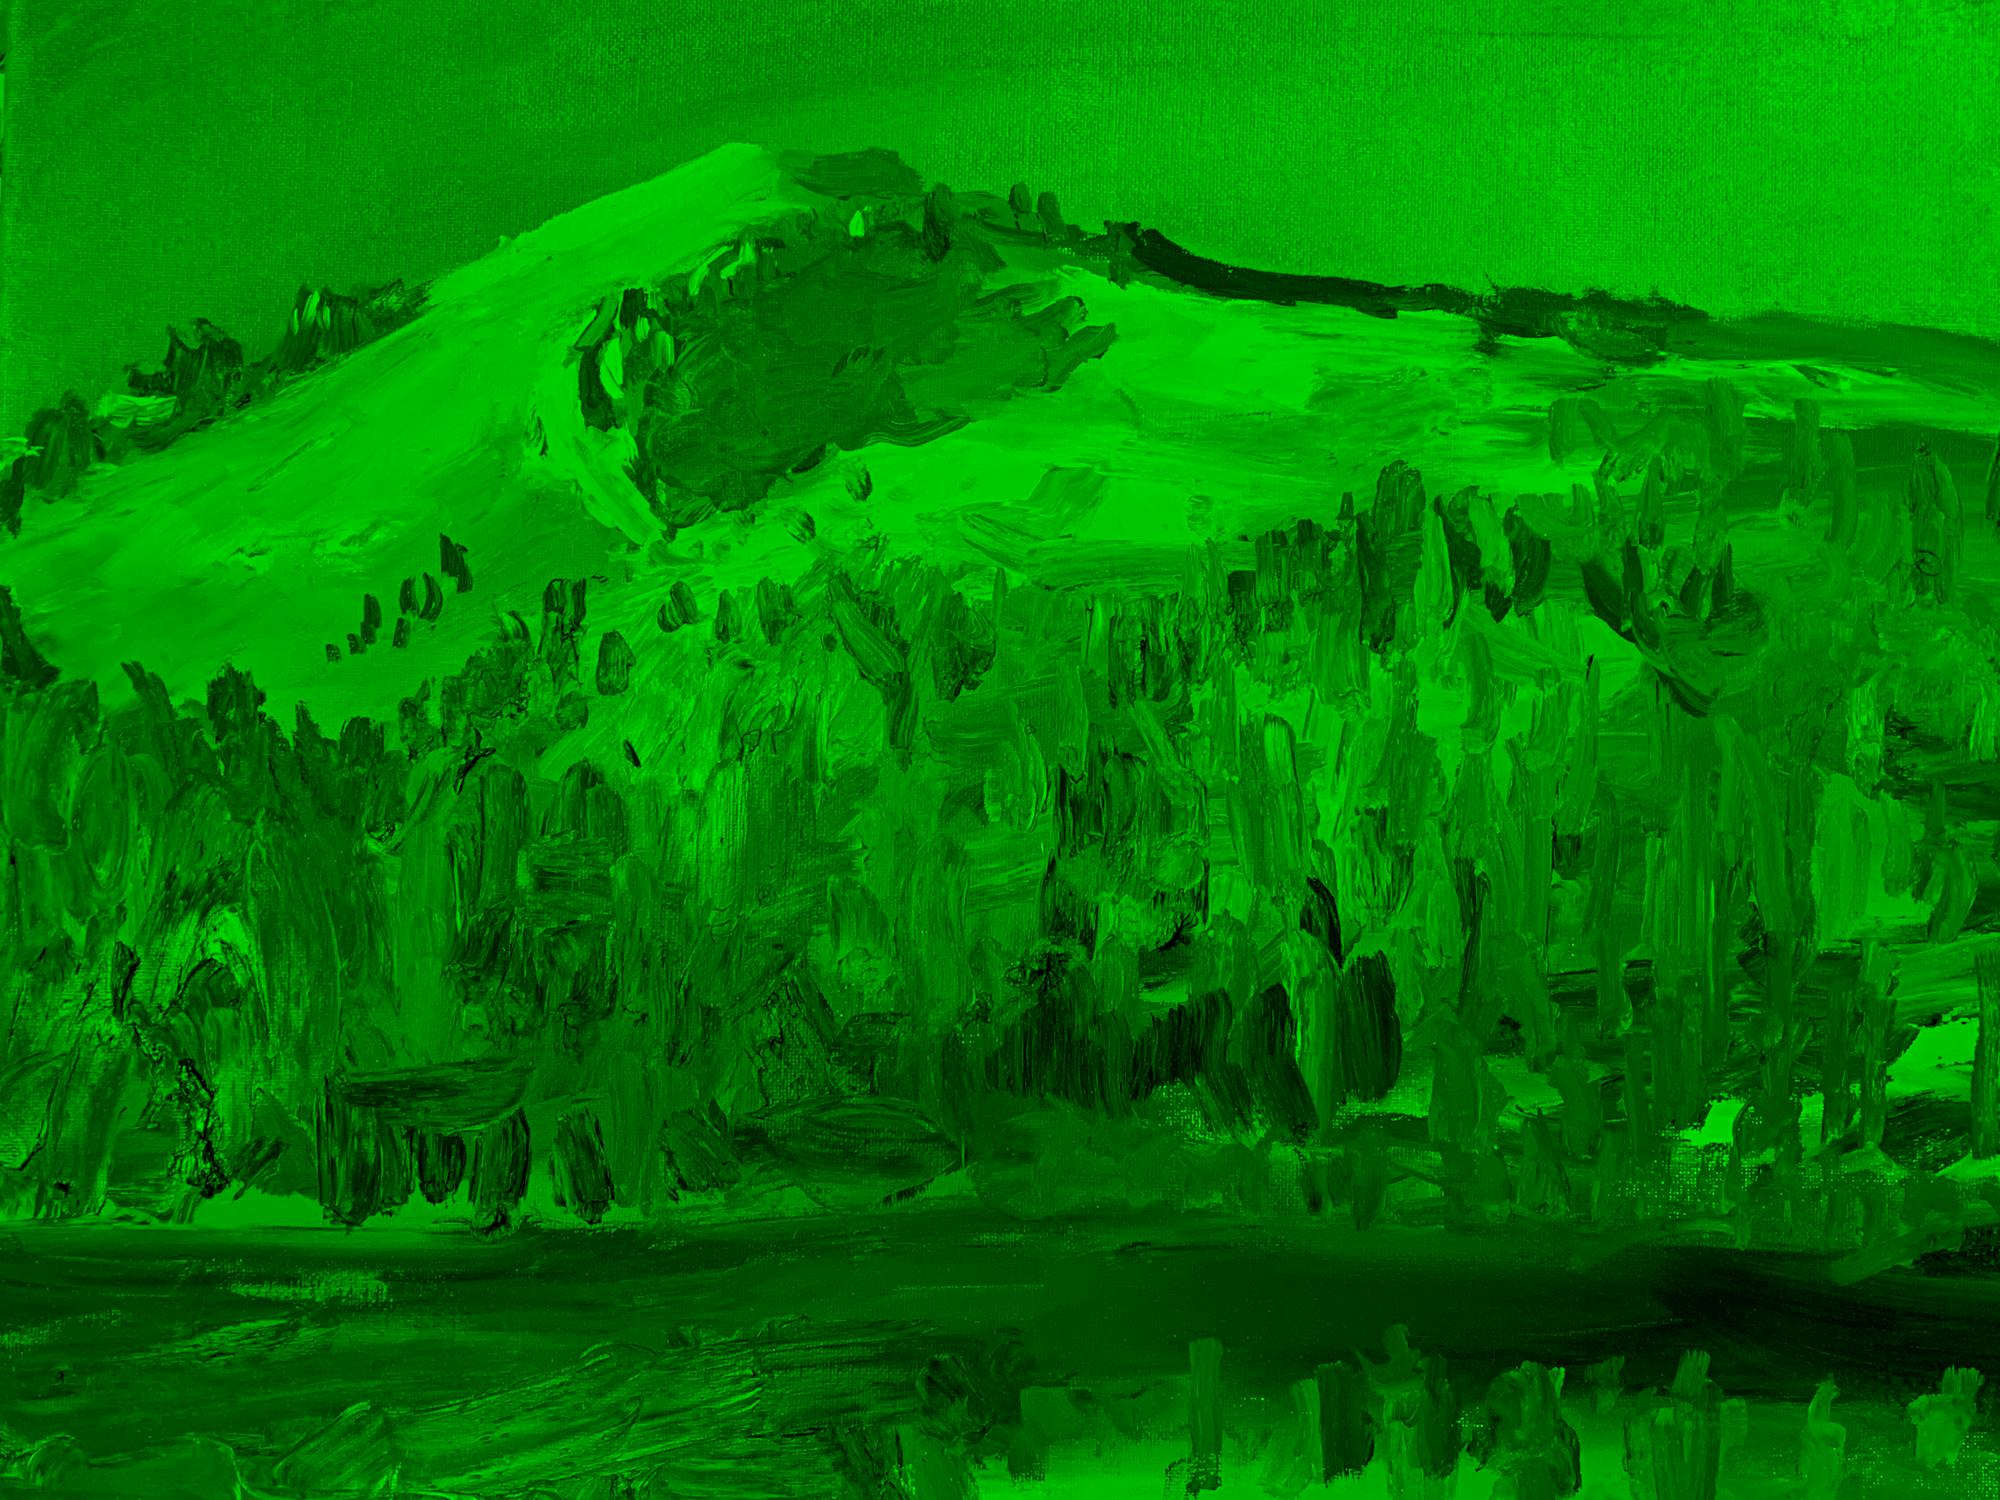


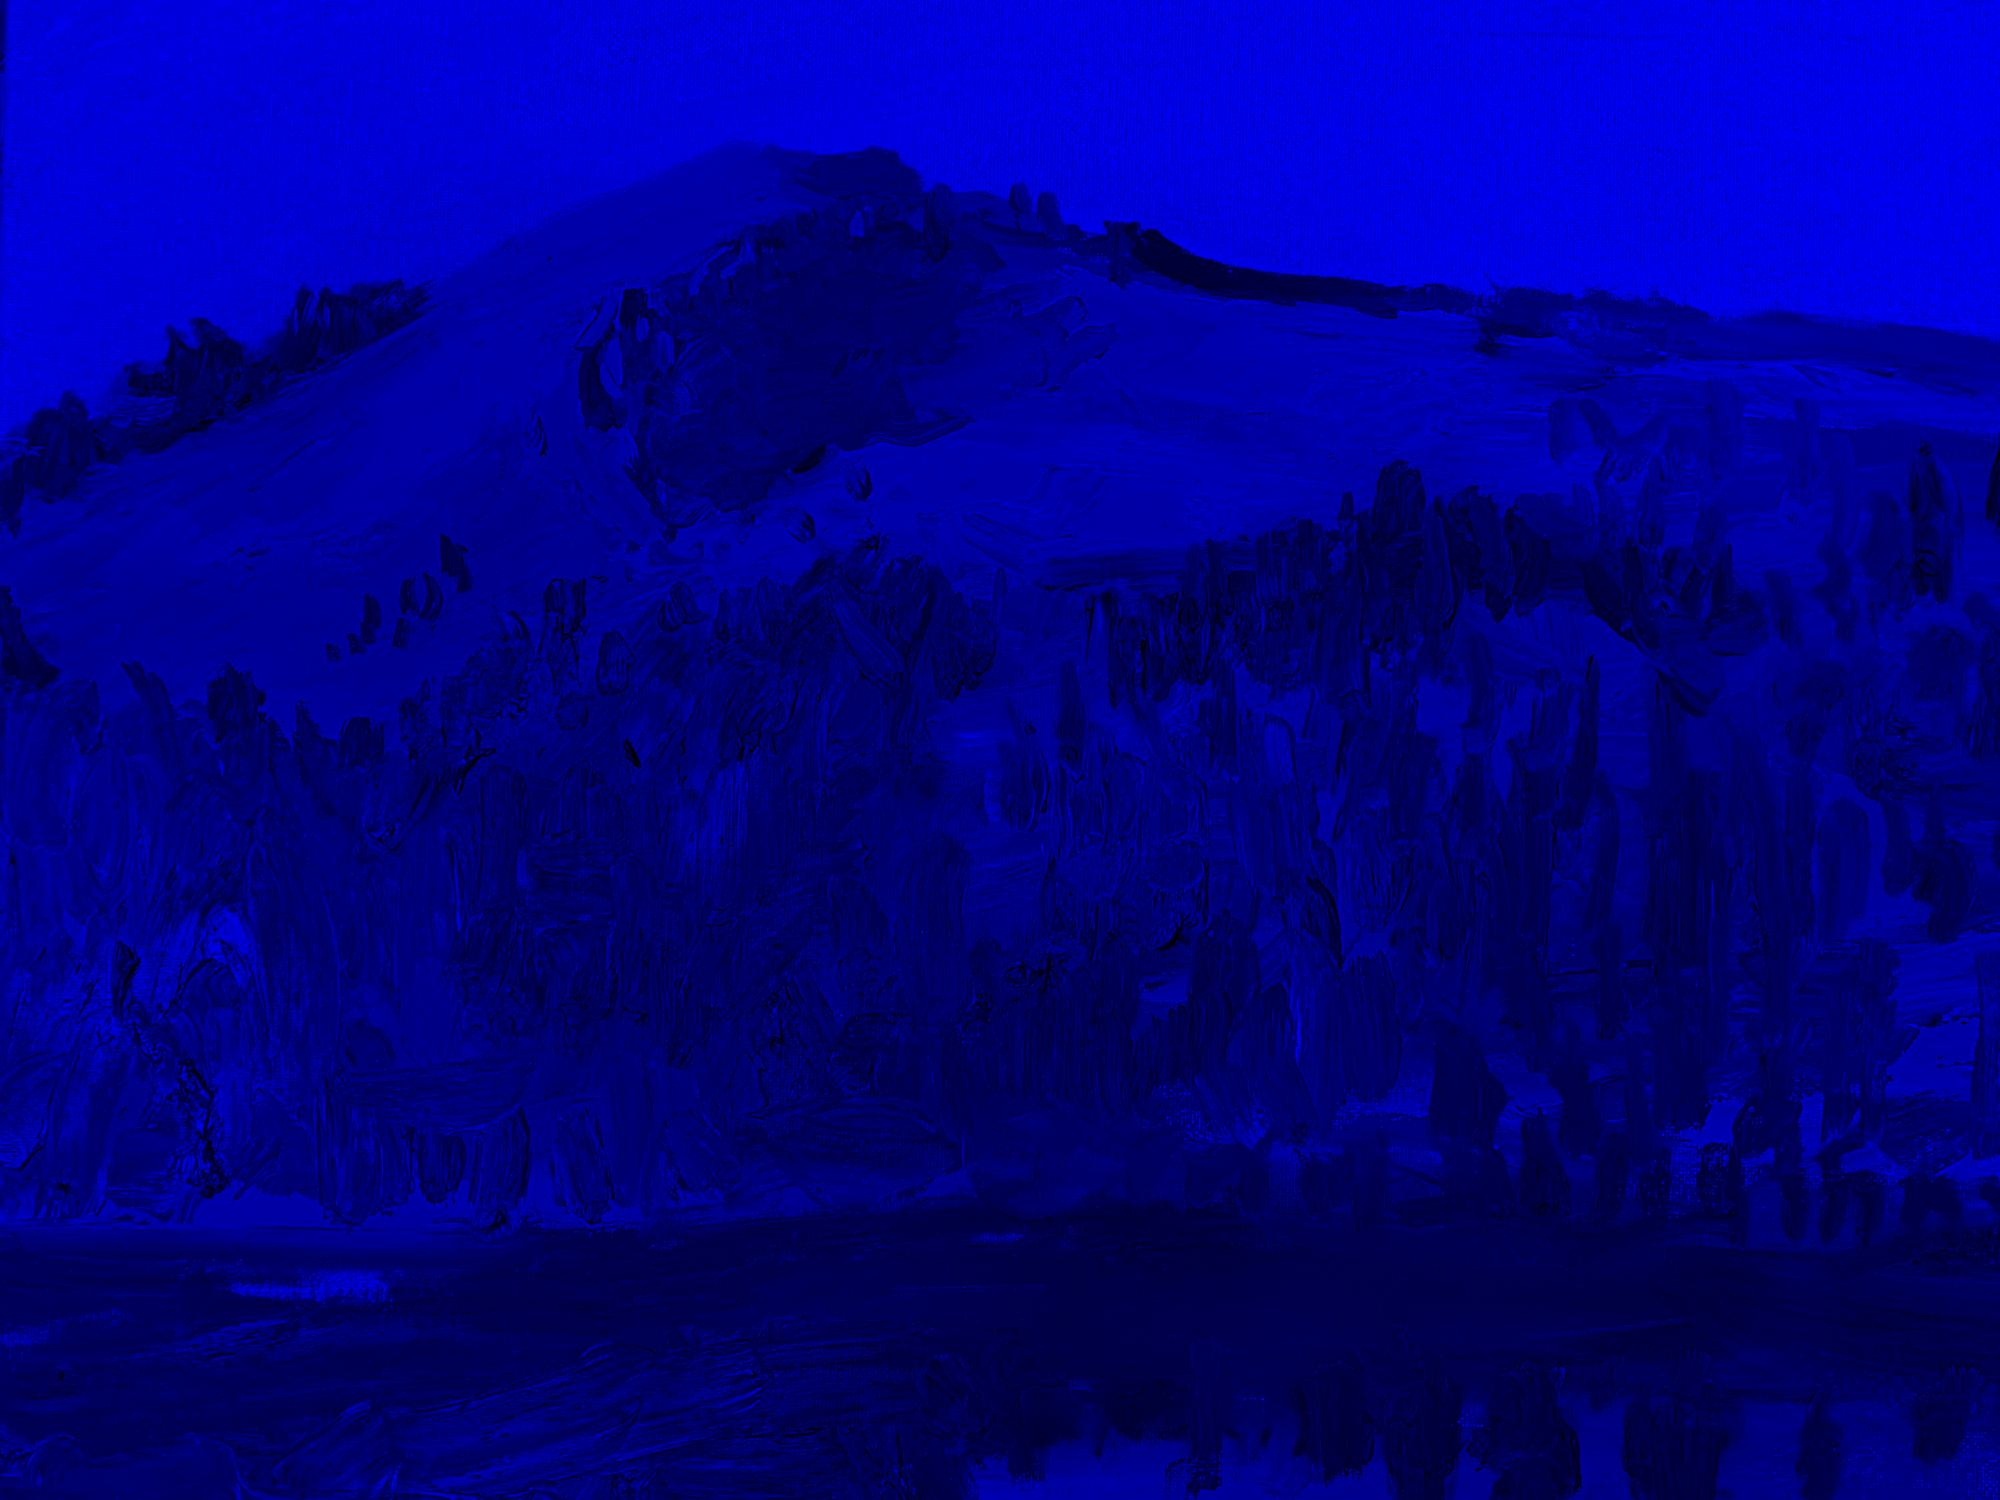

---- meta data -----
Clouds Impression
Peter Carolin
PNG
RGBA
Original size:  (320, 234)
Scaled size:  (2000, 1462)
-- images --



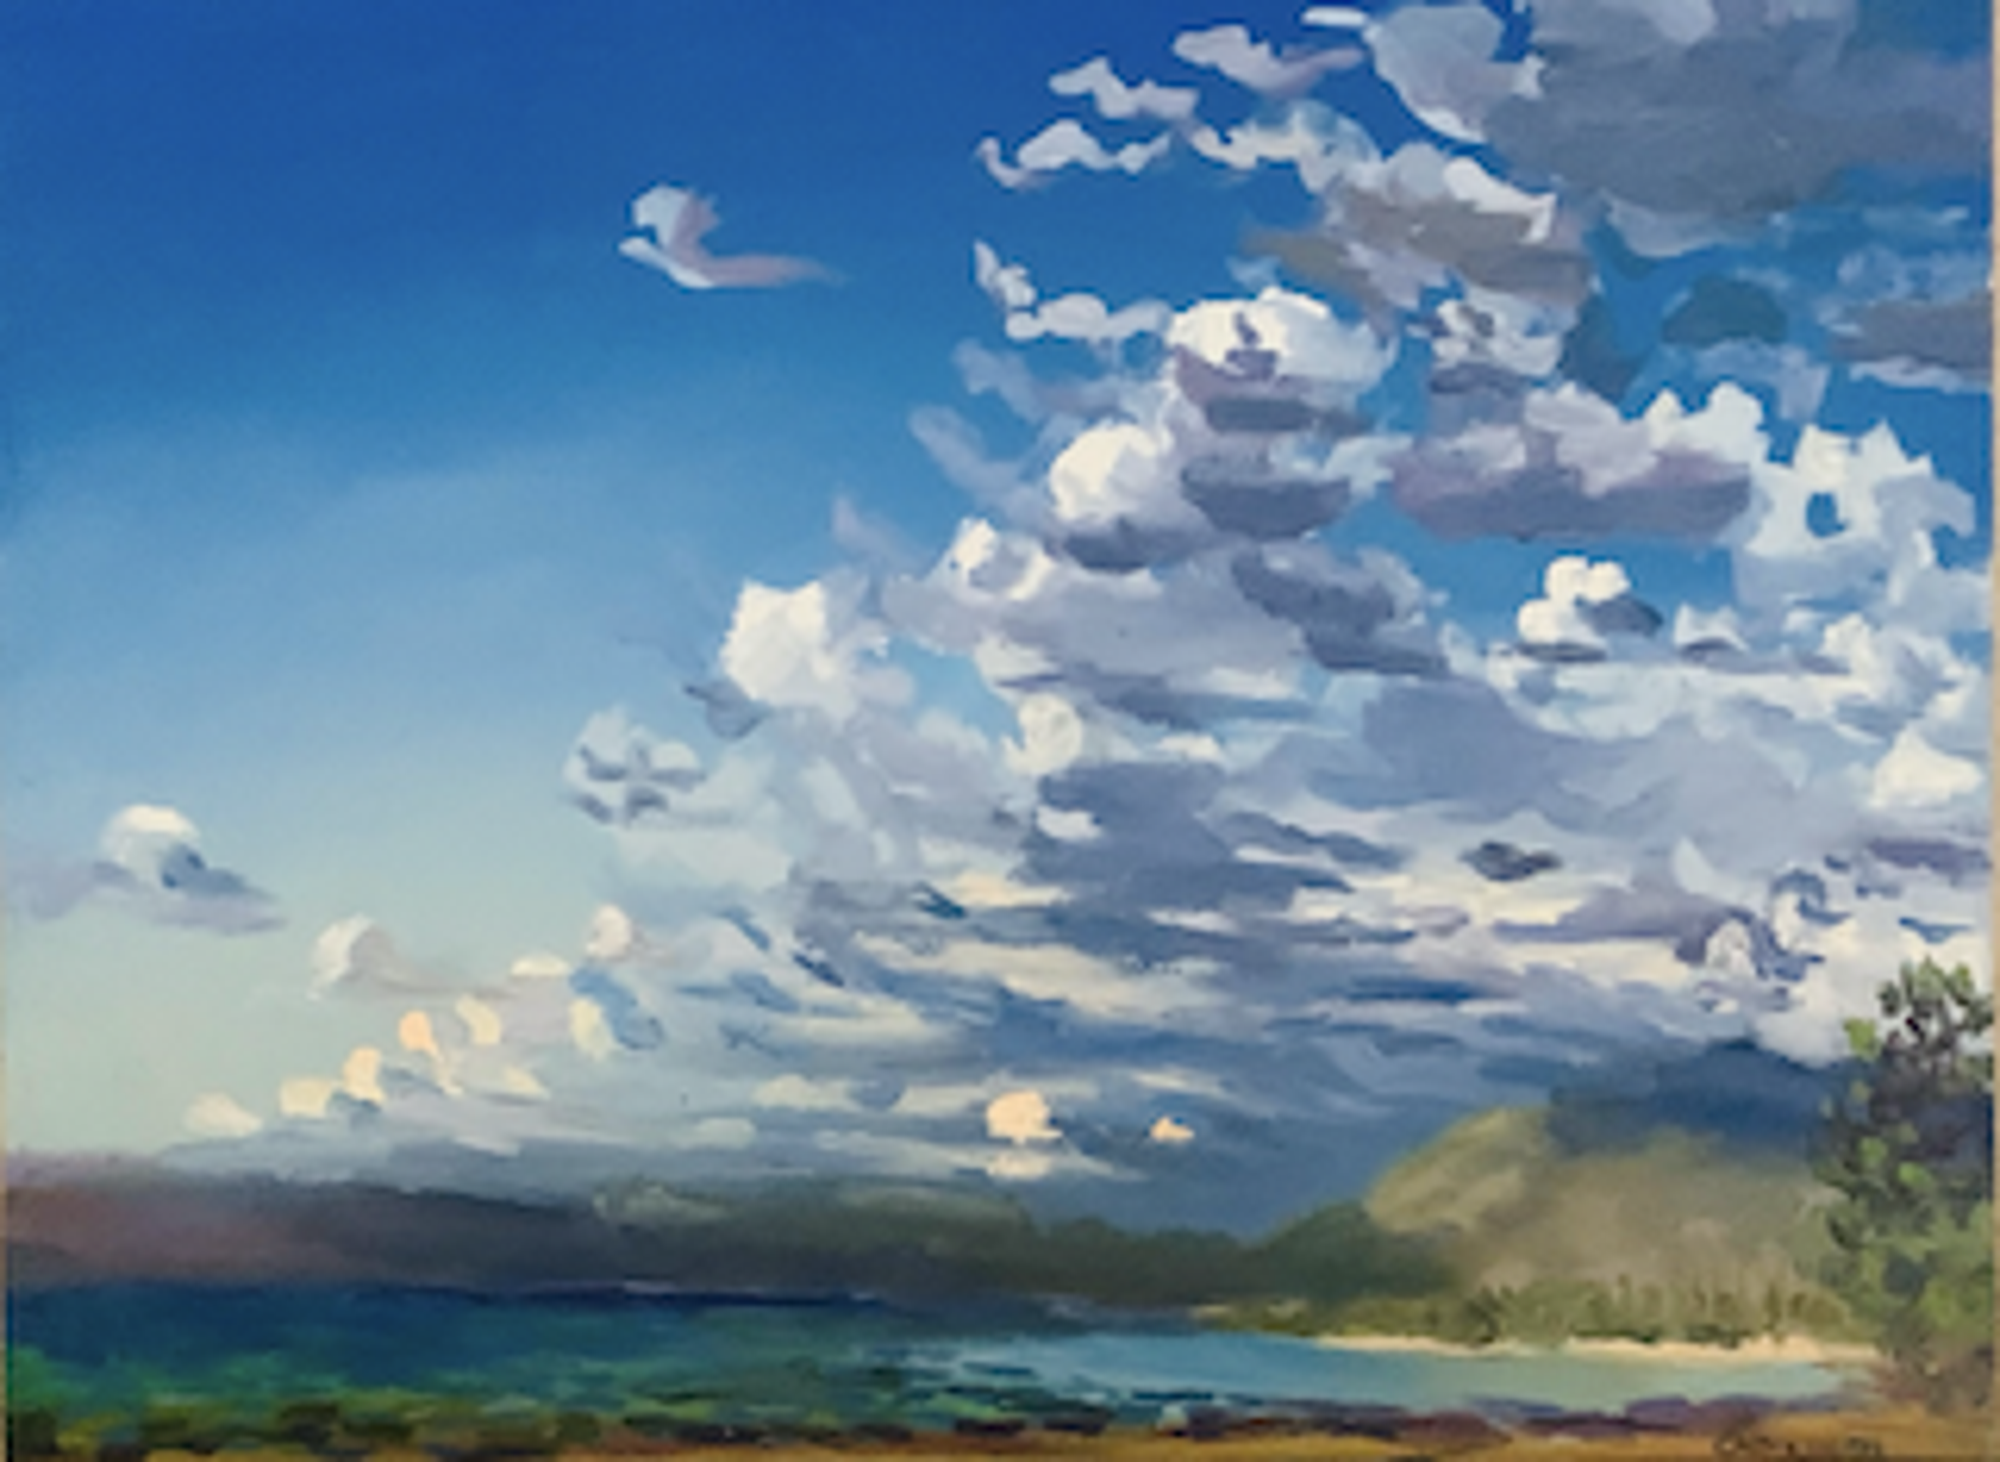


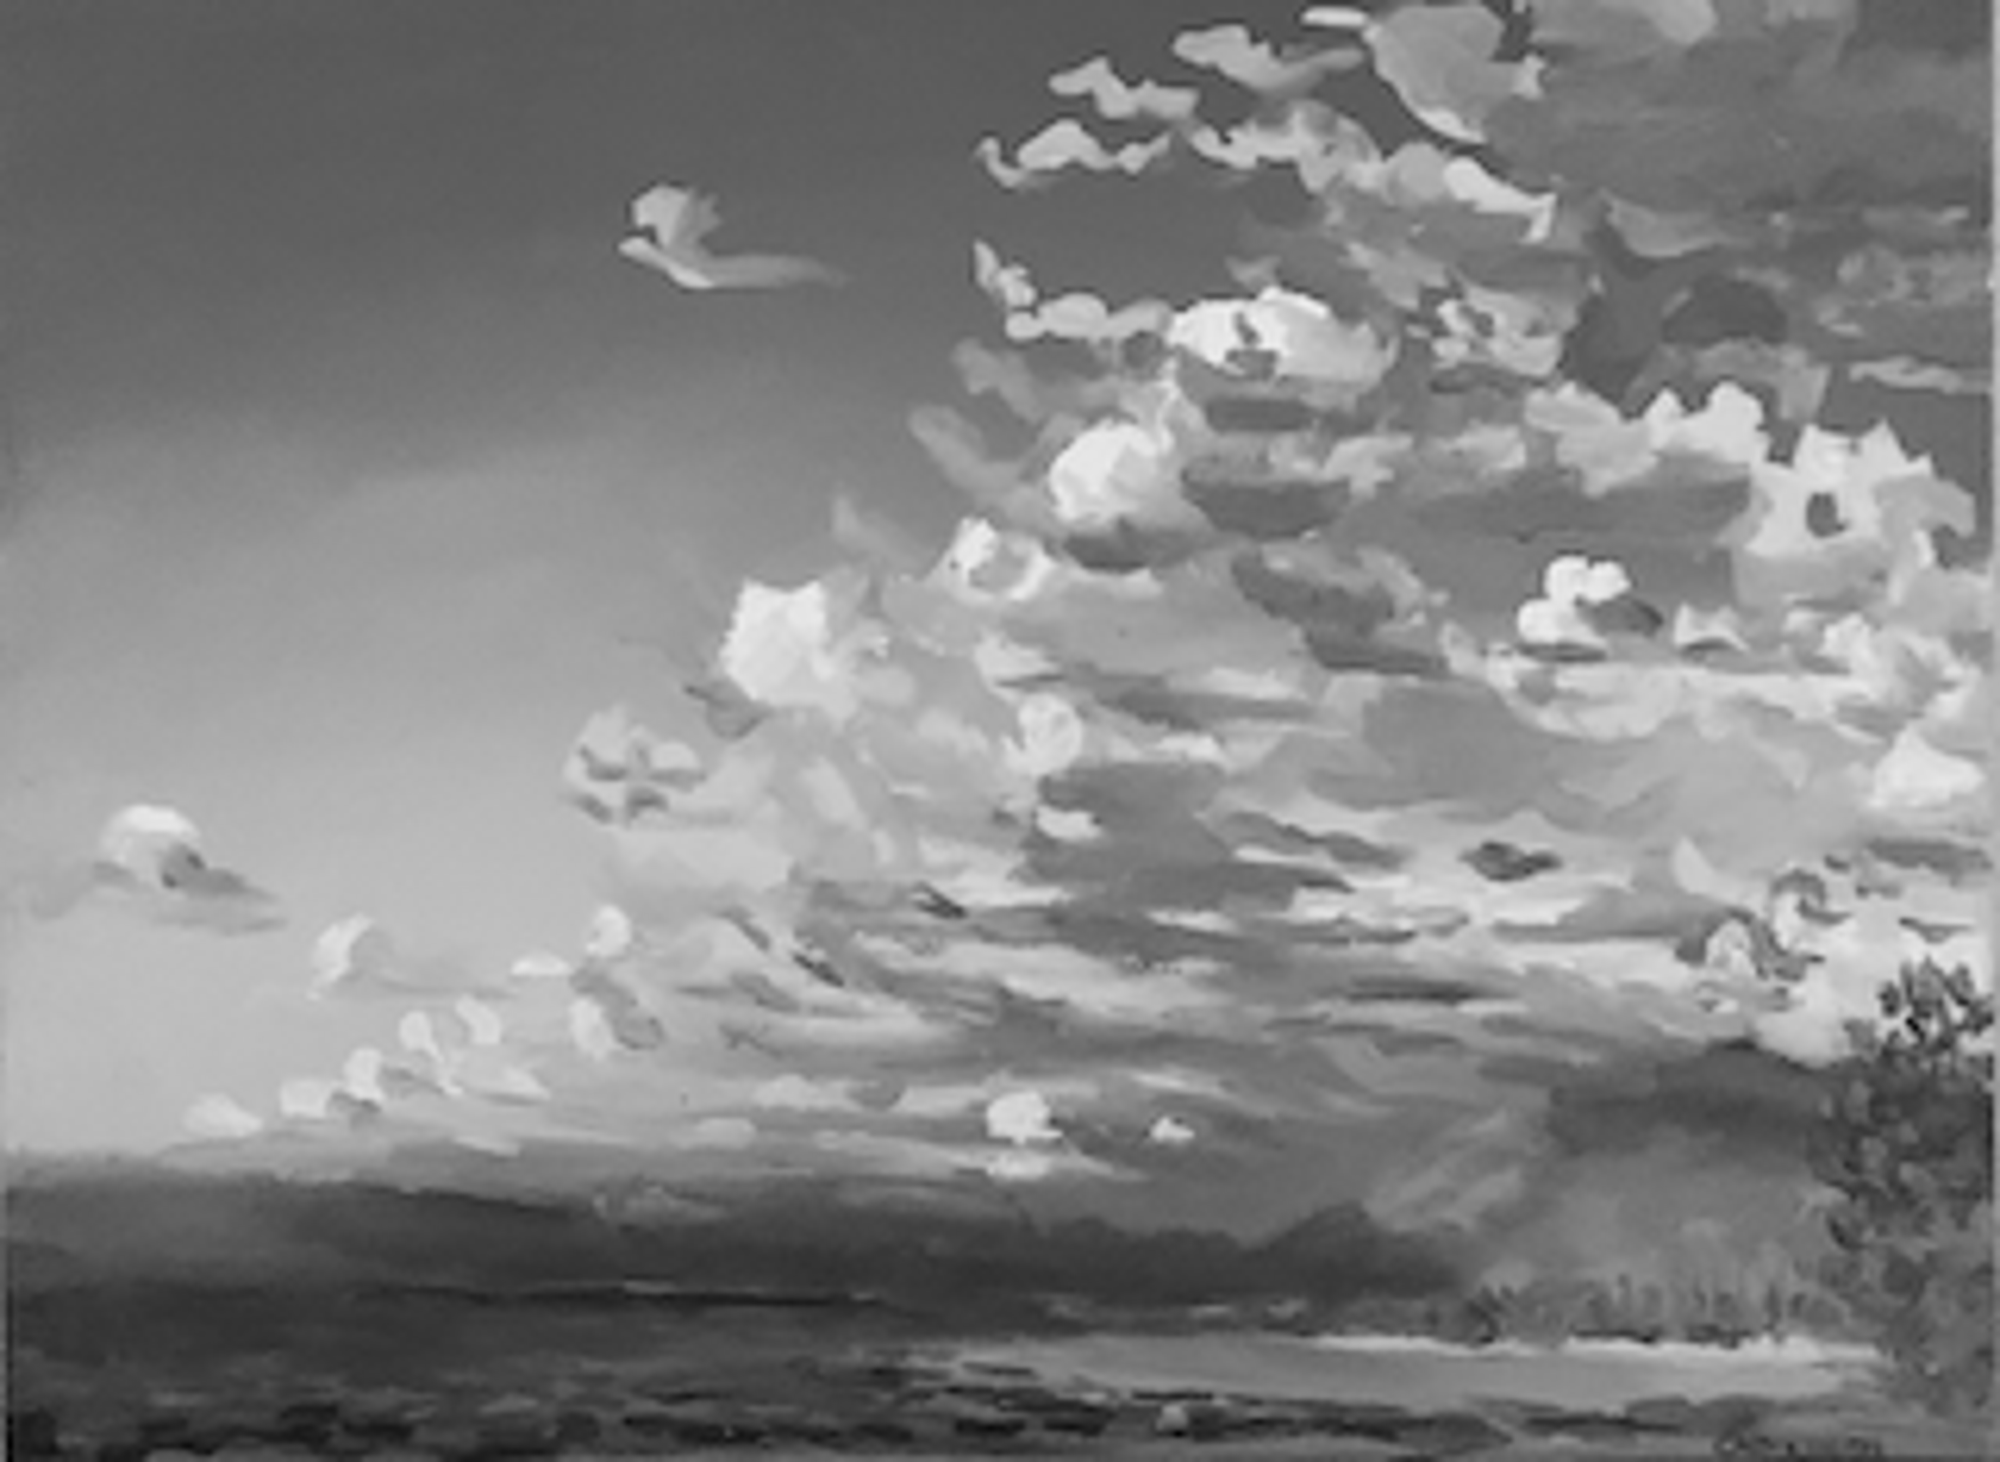


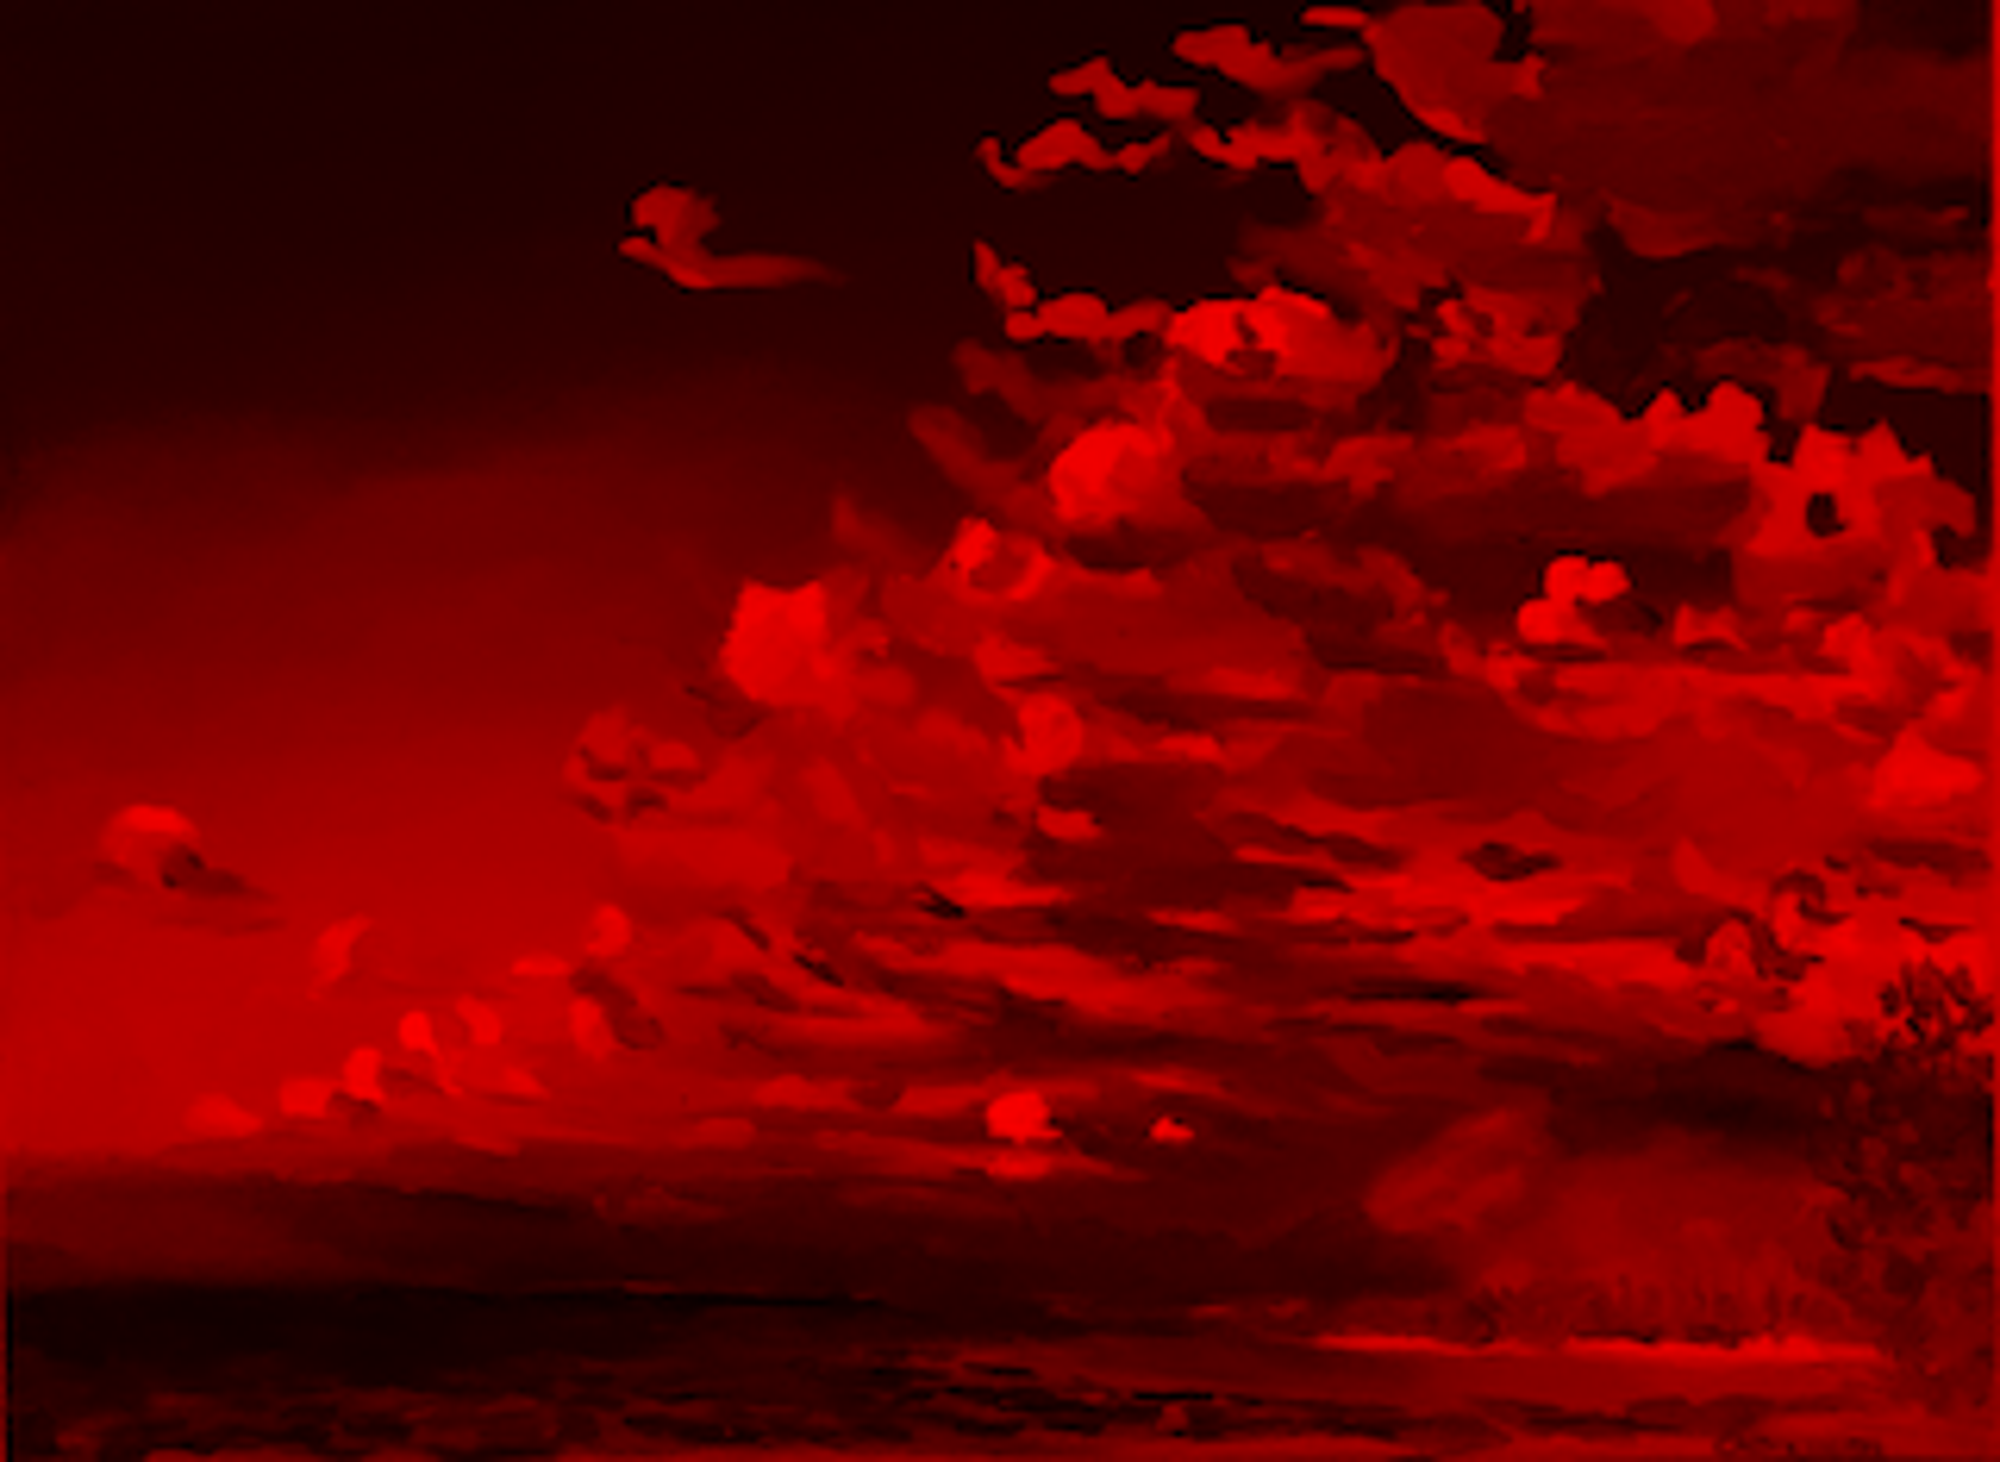


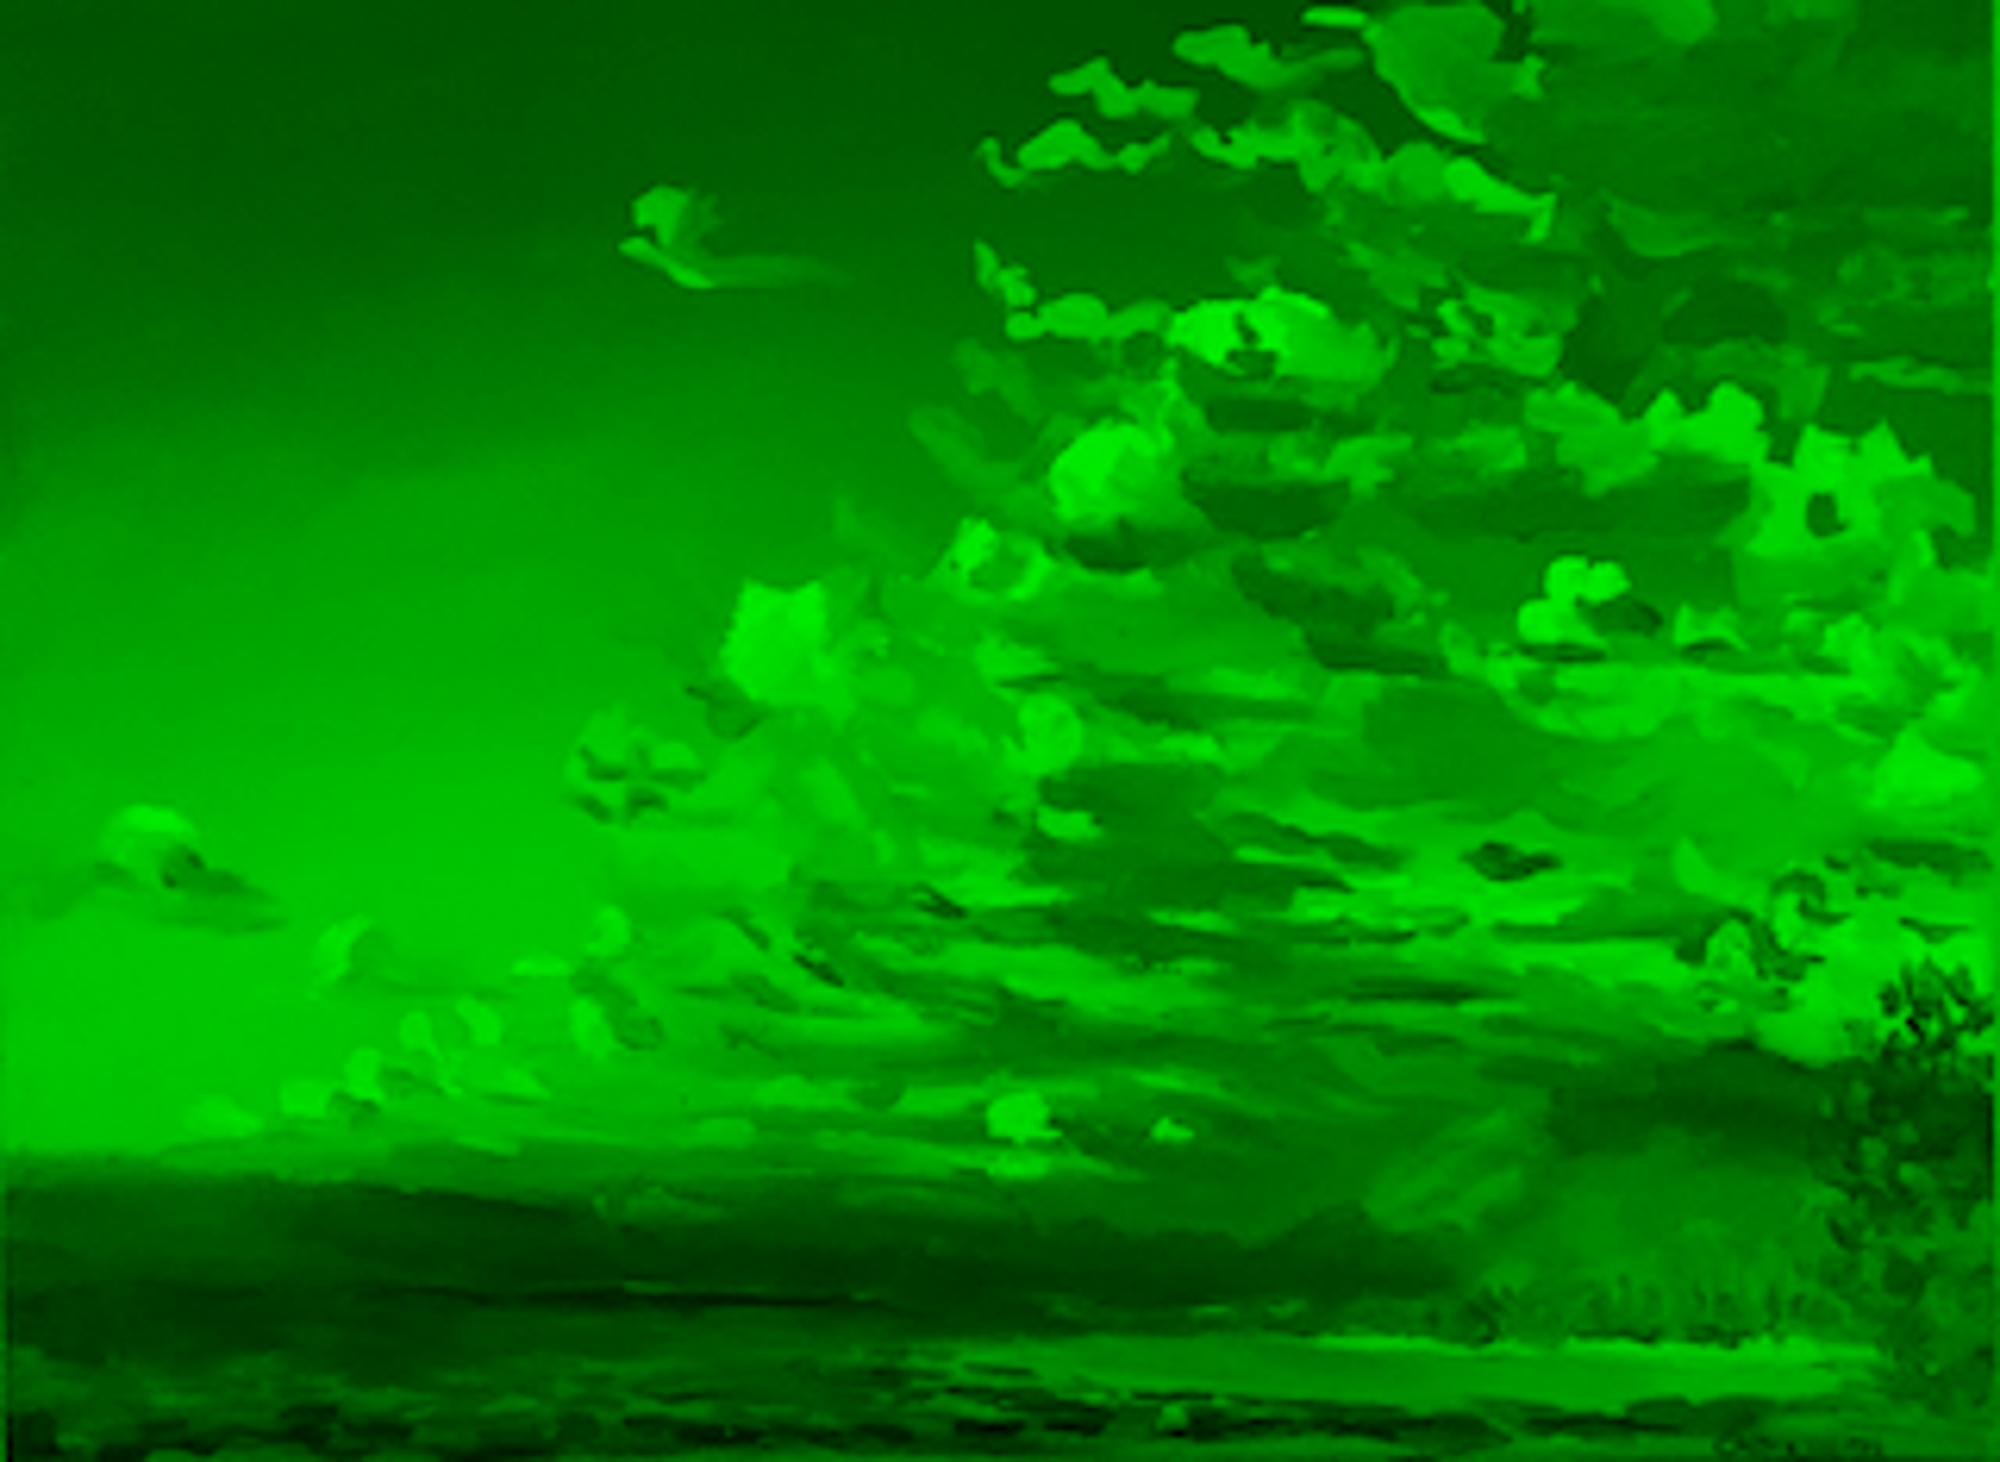


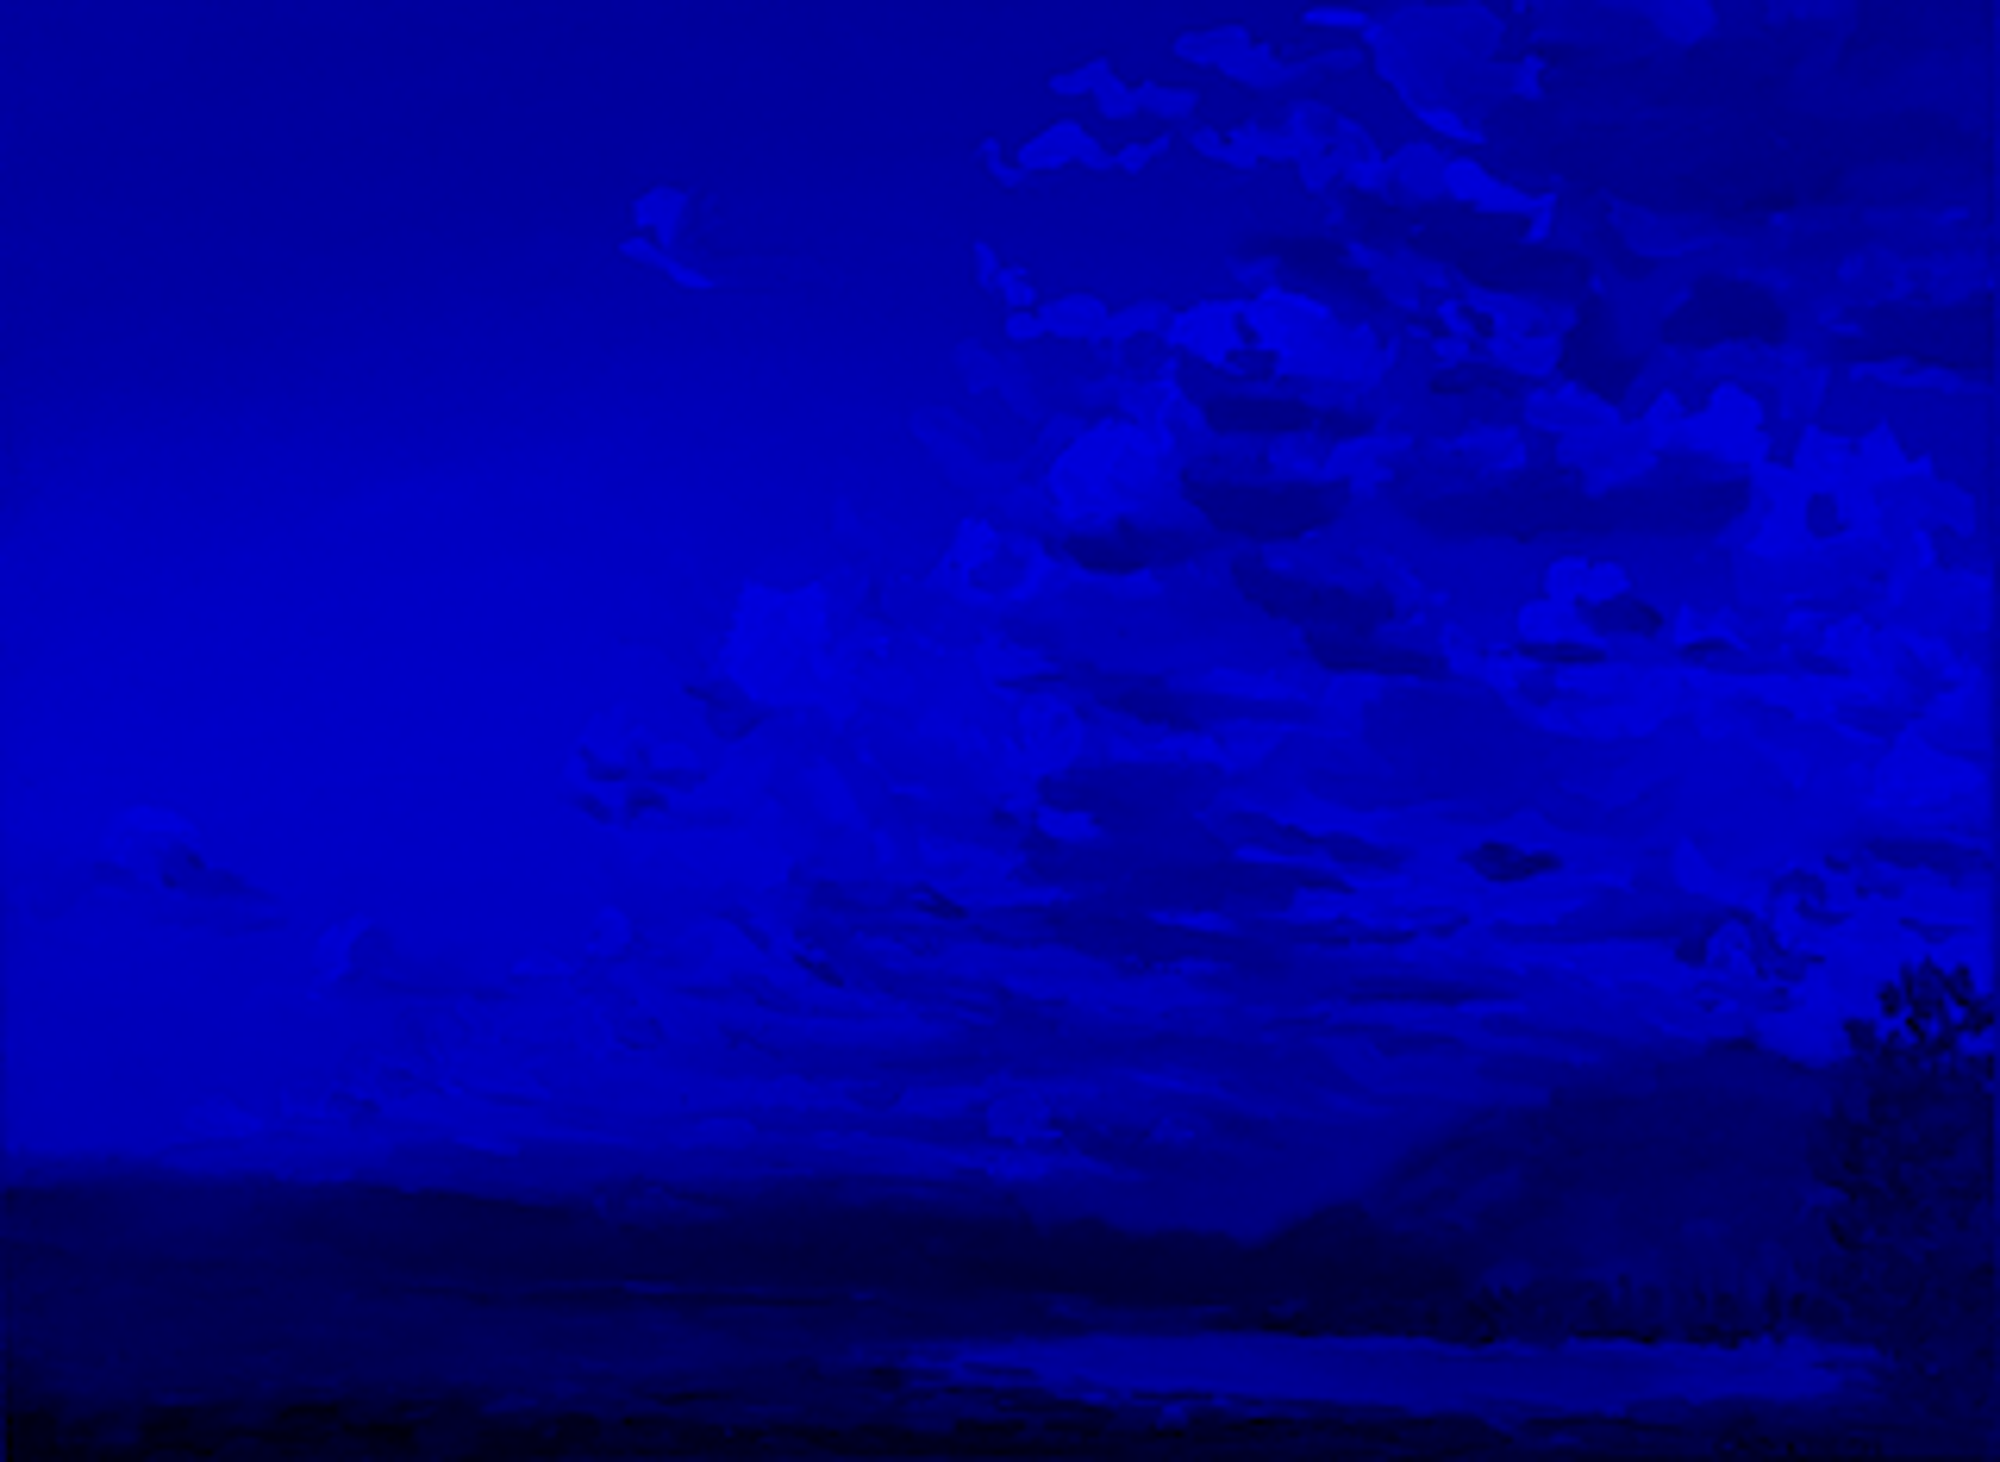

---- meta data -----
Green Square
Internet
PNG
RGBA
Original size:  (16, 16)
Scaled size:  (2000, 2000)
-- images --



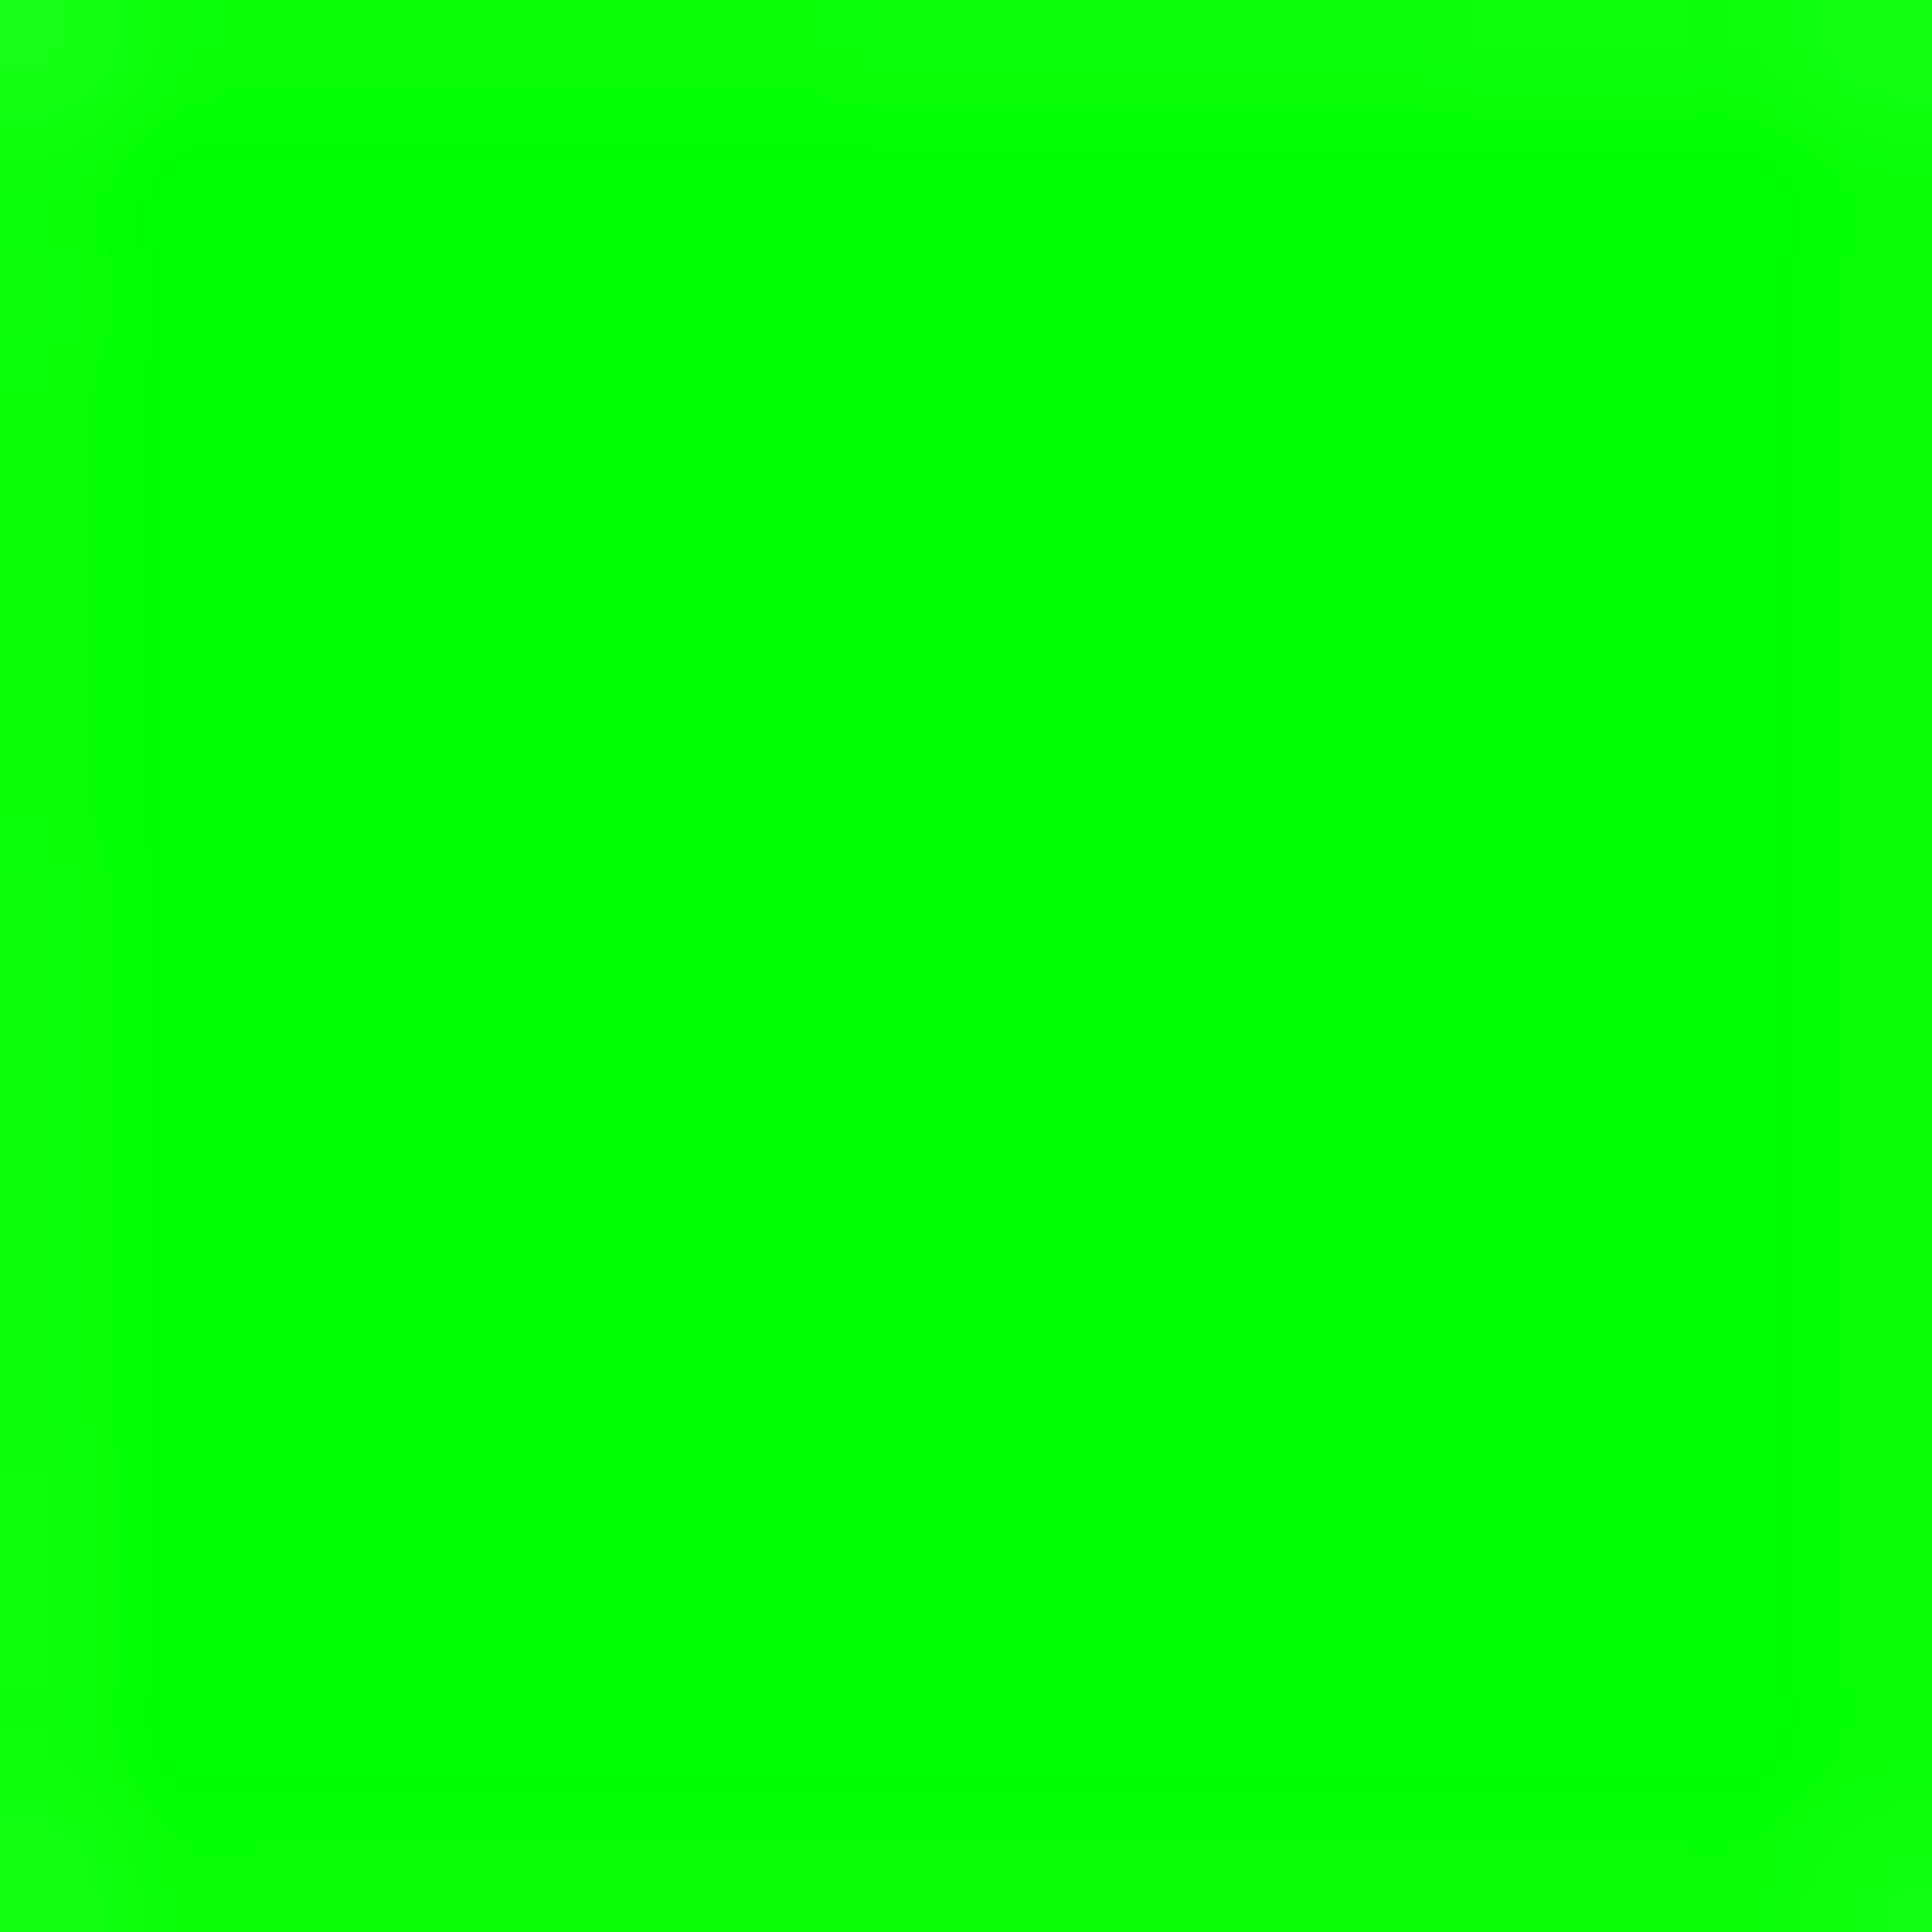


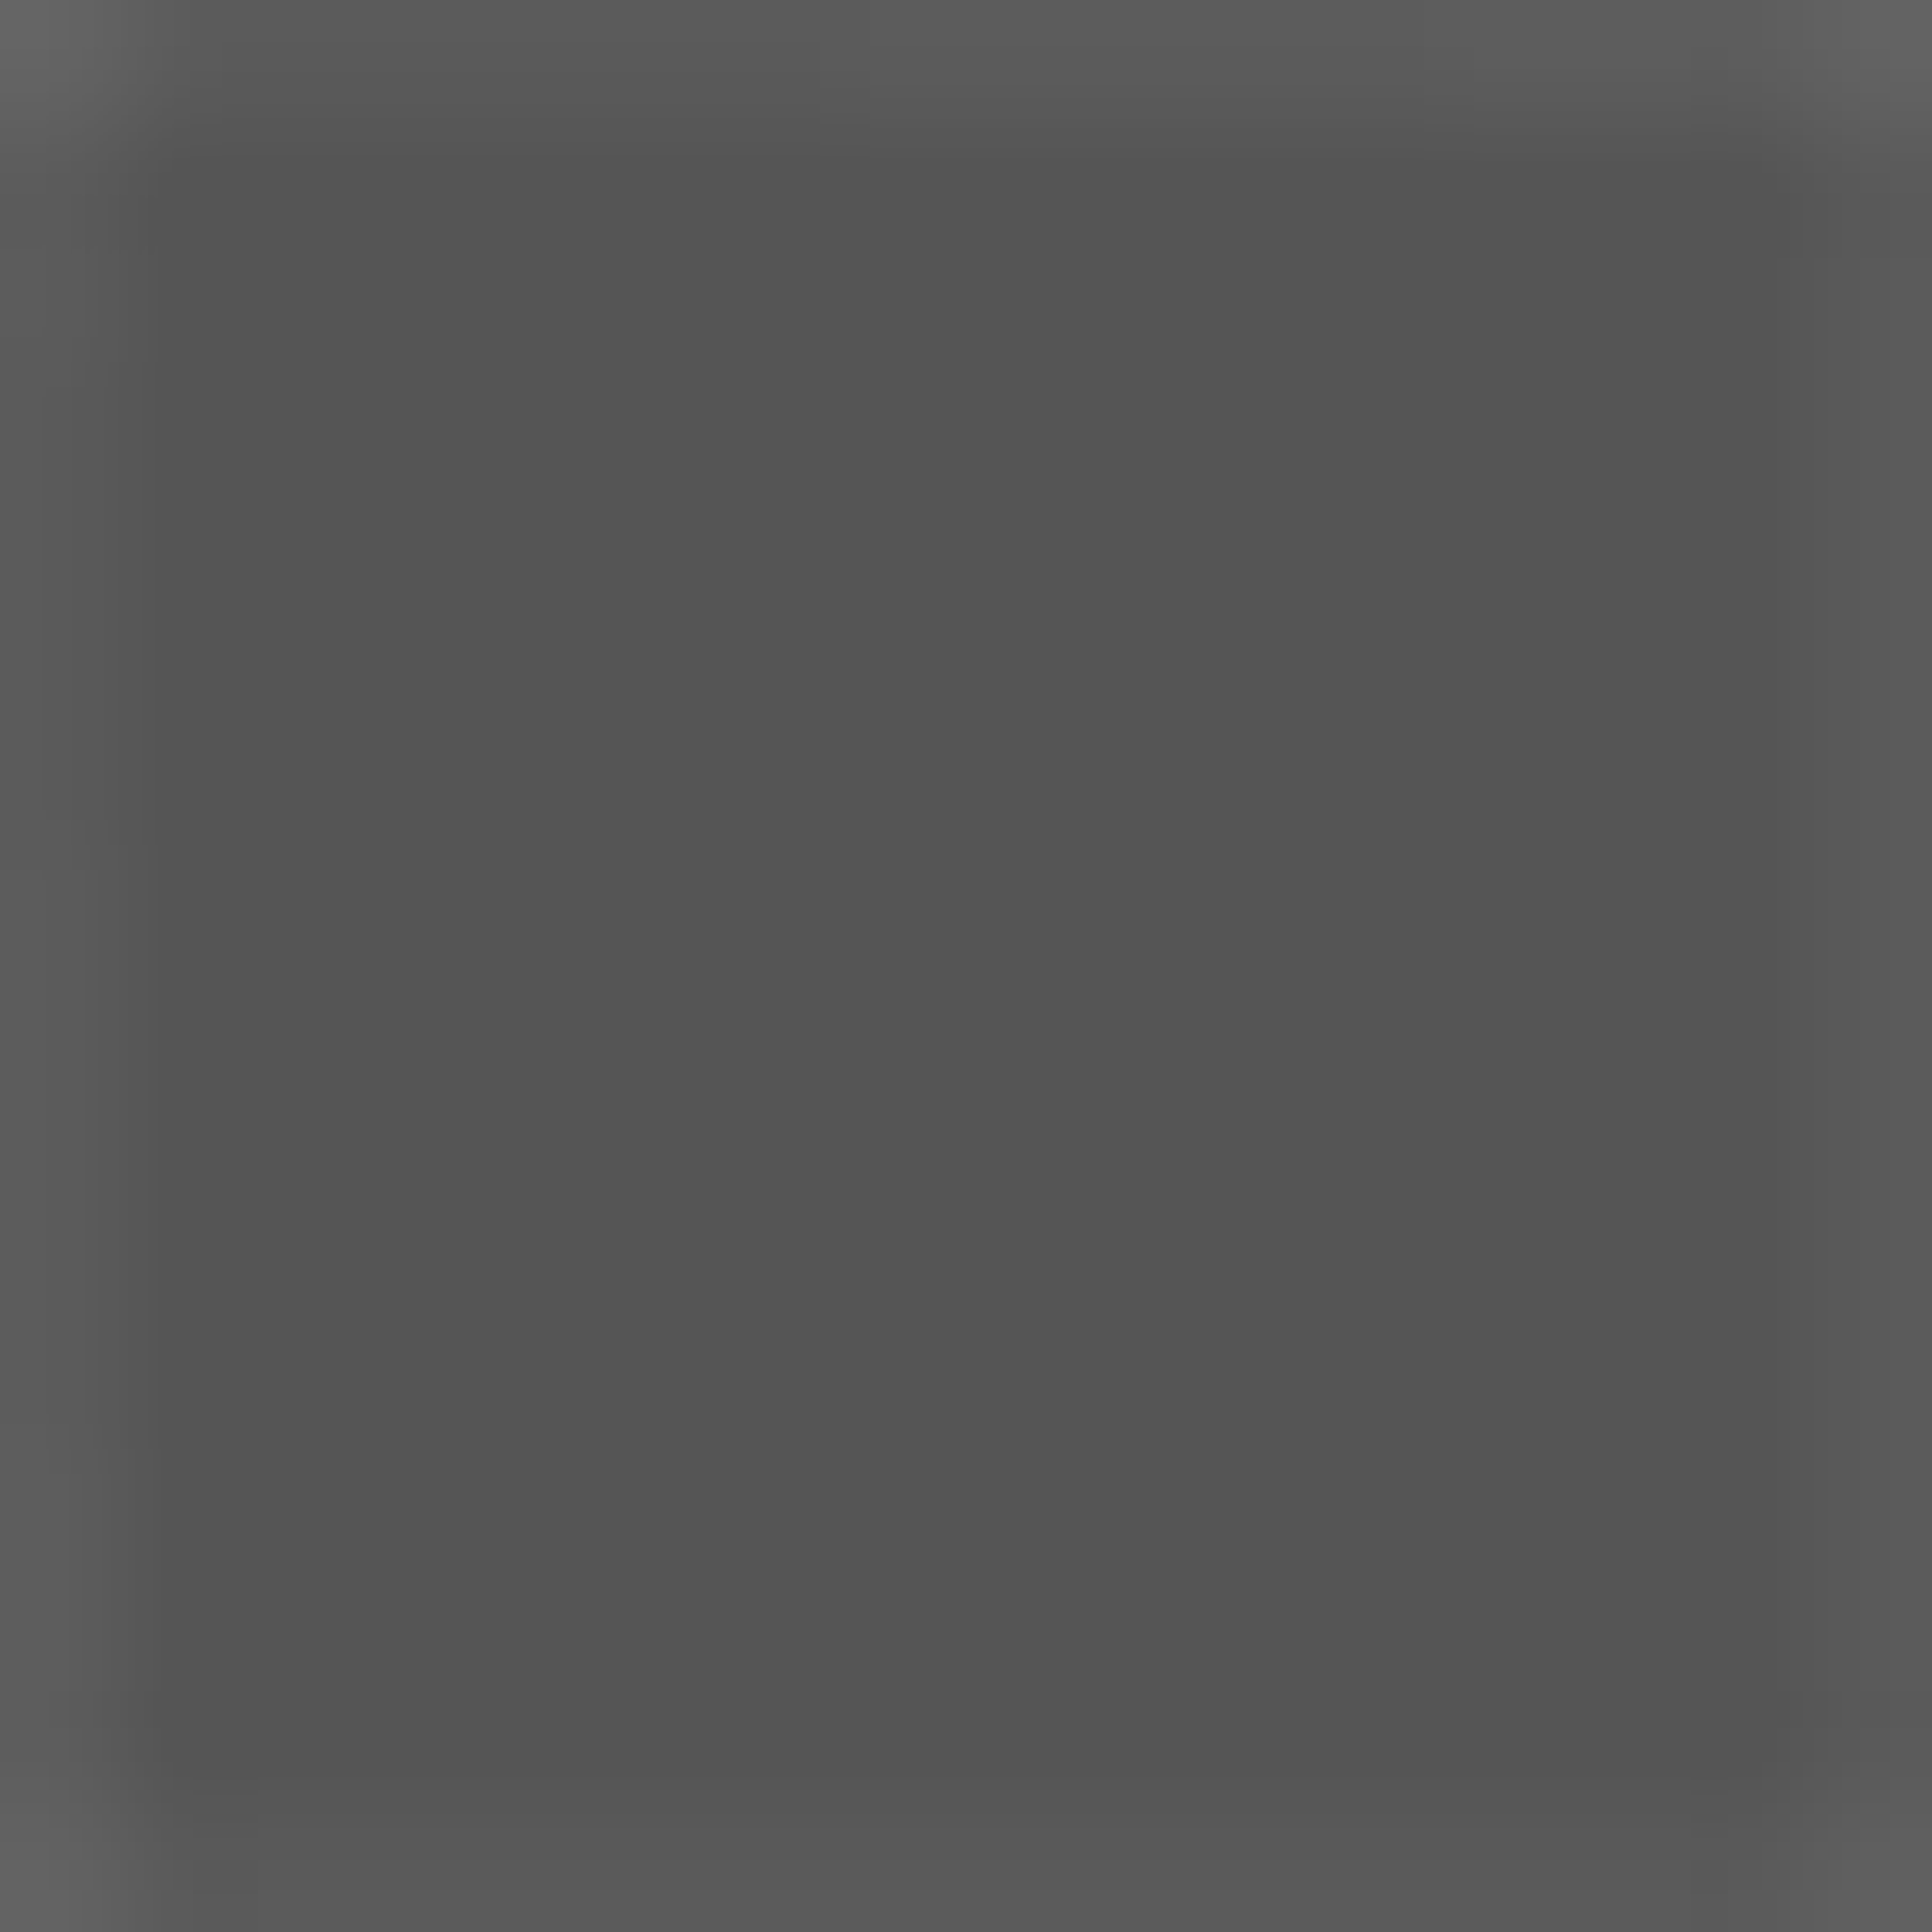


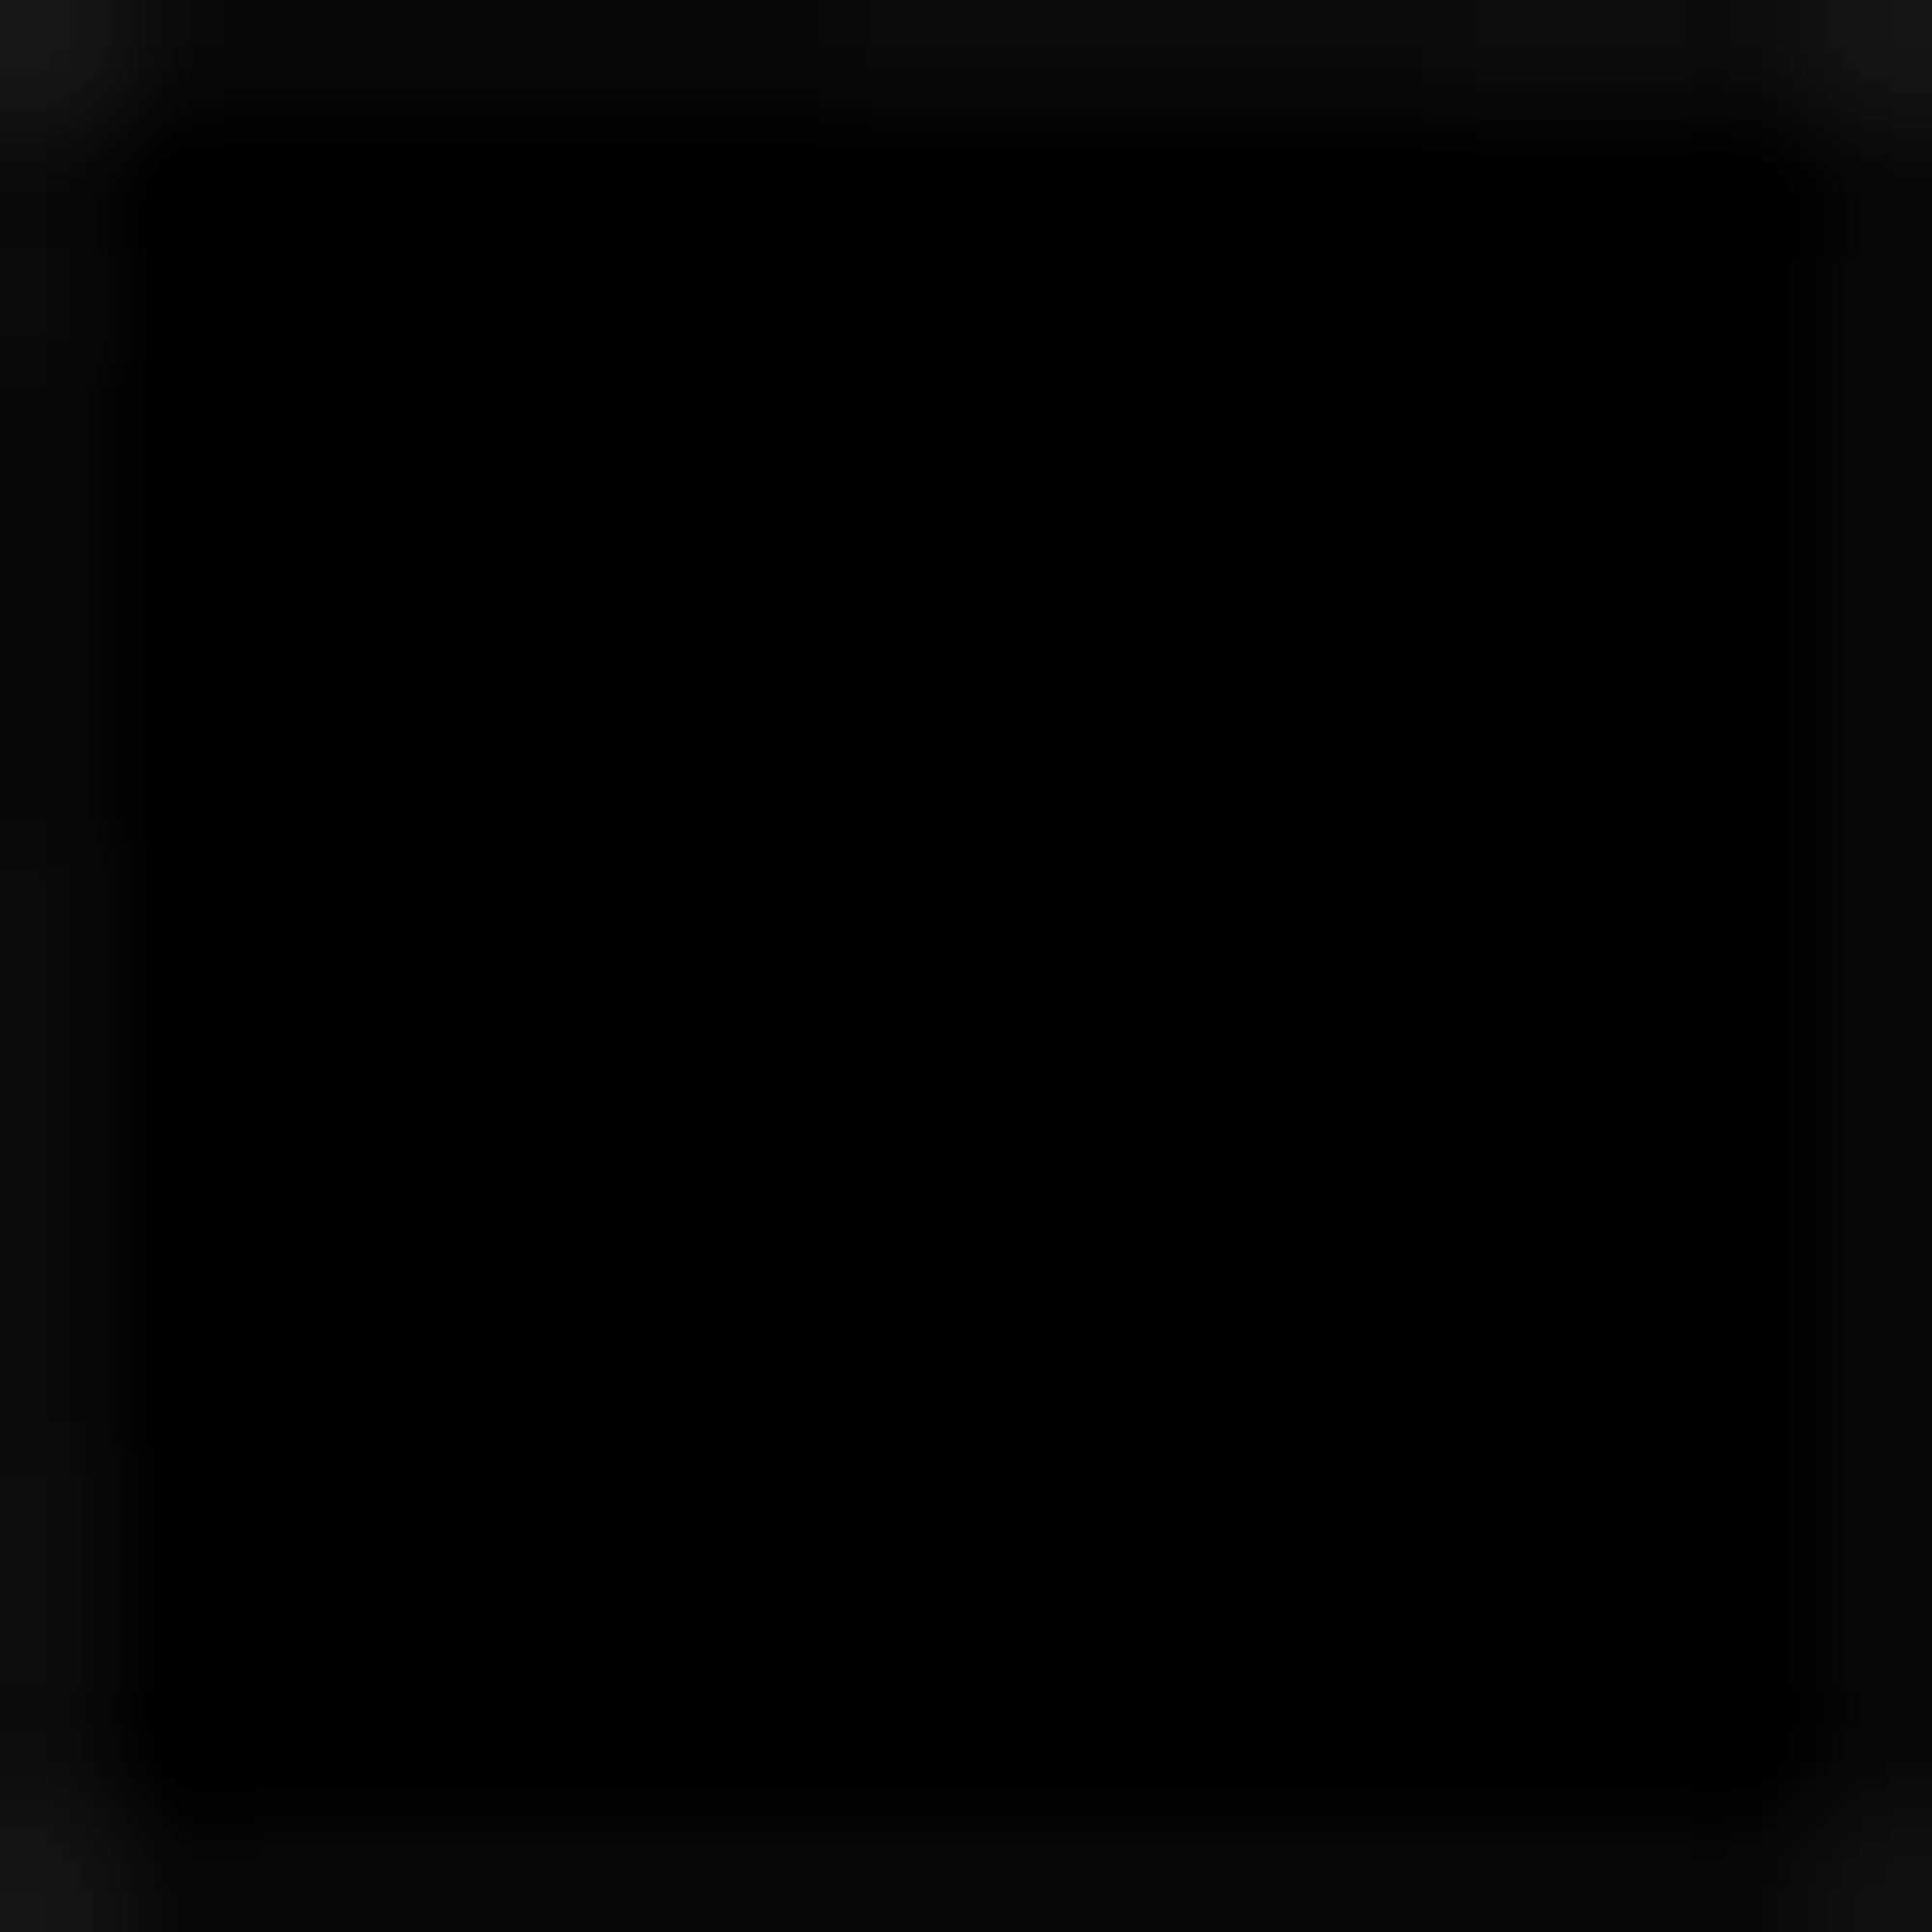


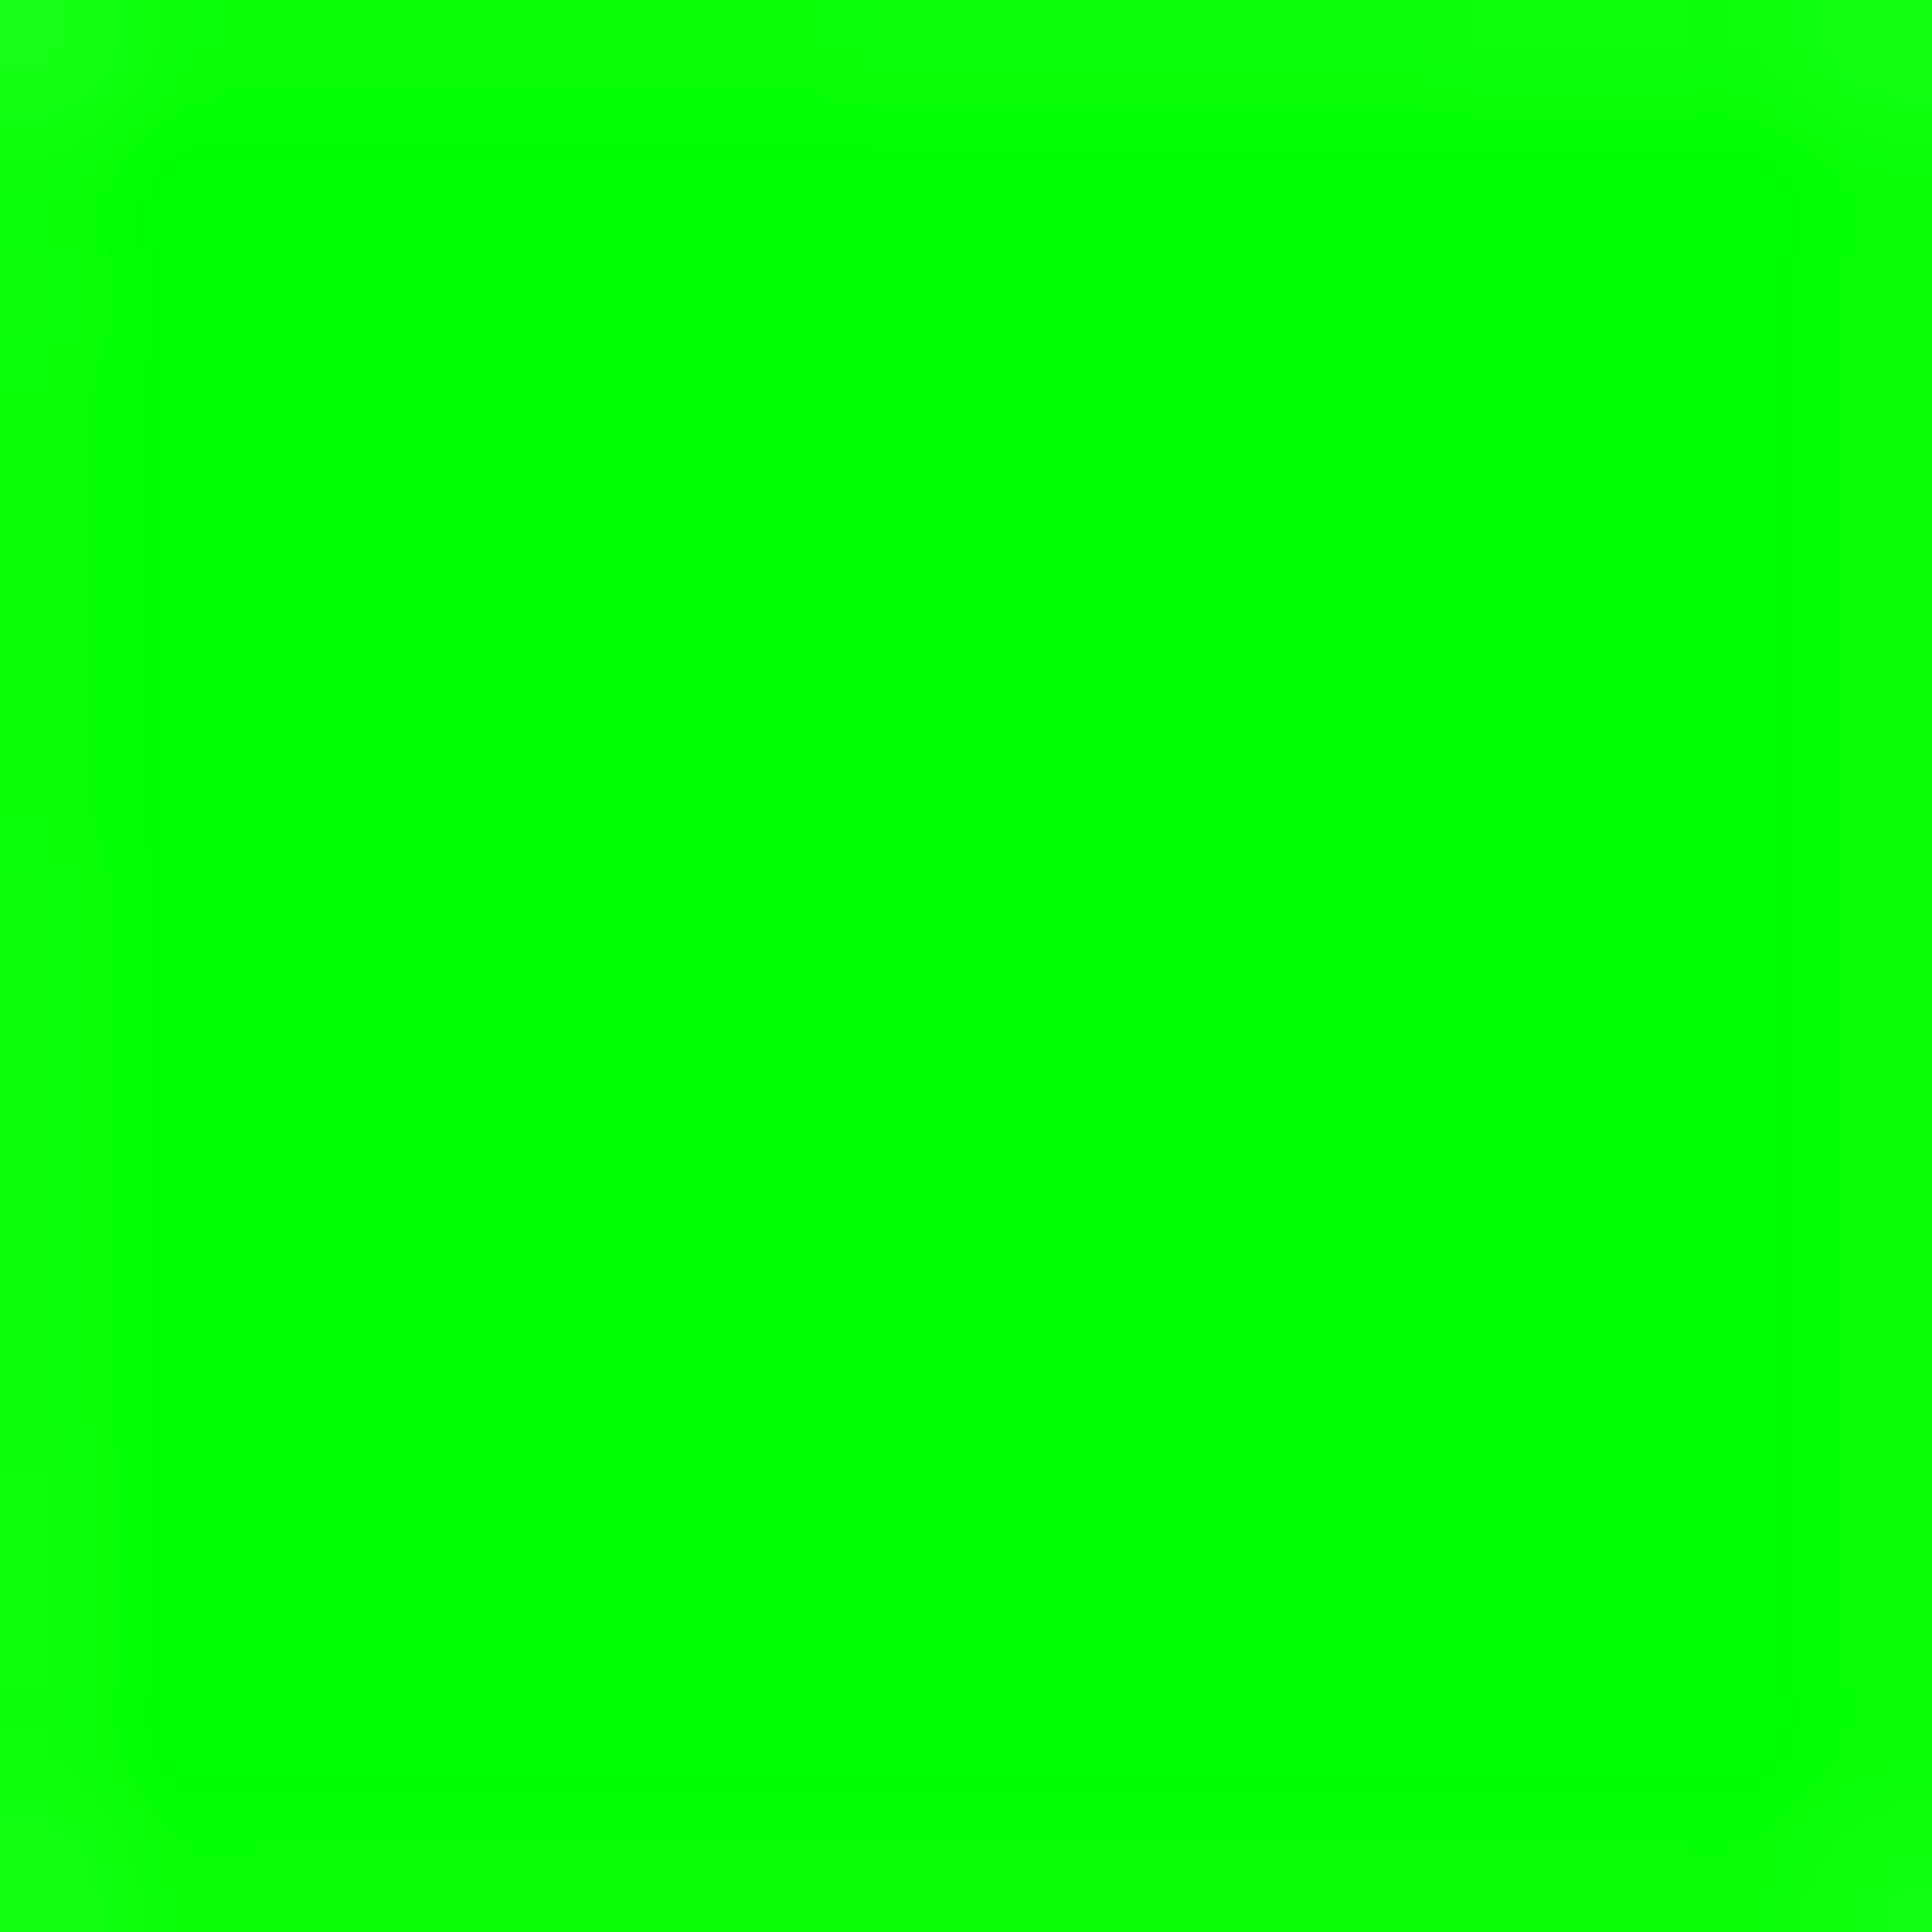


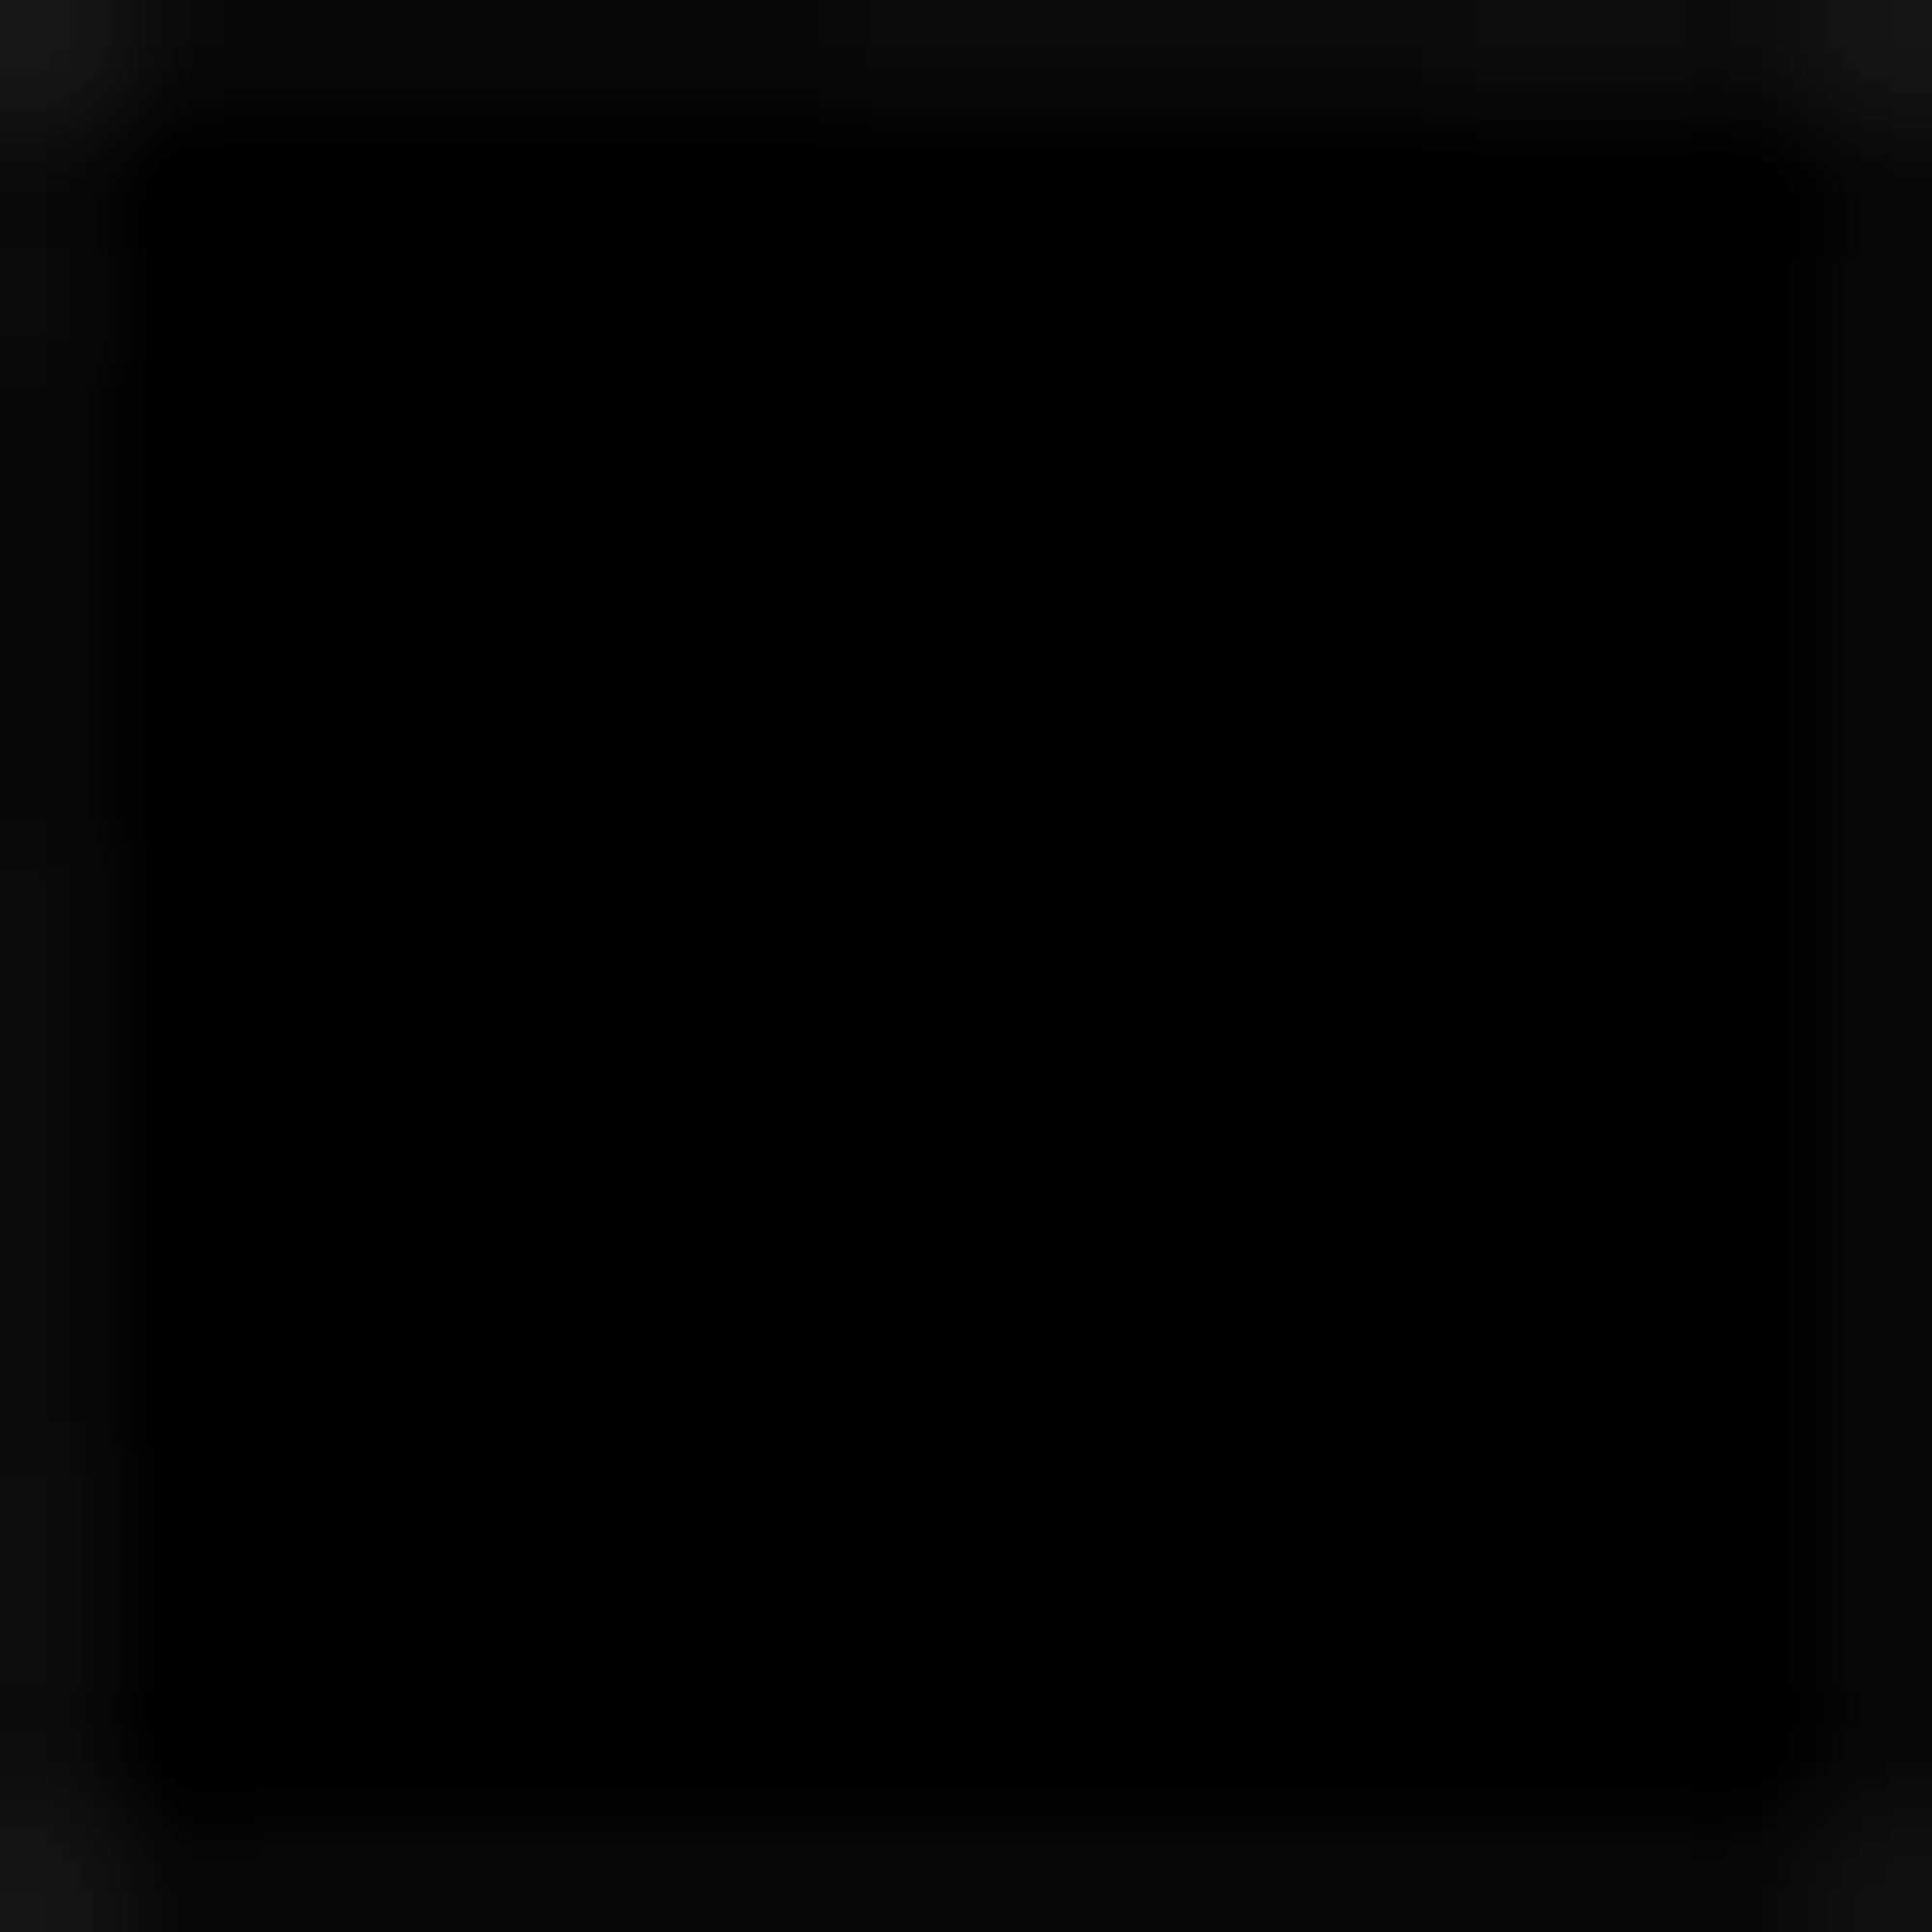

In [11]:
import concurrent.futures

# Jupyter Notebook Visualization of Images
if __name__ == "__main__":
    # setup default images
    images = image_data()
    
    # Parallel Processsing
    # executor allocates threads, it considers core execution capability of machine
    with concurrent.futures.ThreadPoolExecutor() as executor:
        executor.map(process_image, images)  # order is not predictable
        
    print()

## Observing Parallel Computing and Threads
> You can observe Processes, CPU Percentage, and Threads with Tools on your machine. Common tools to monitor performance are Activity Monitor on MacOS or Task Manager on Windows.   

- This example is using ```top``` launched in VSCode Terminal. (mac)
- Try ```top -H``` for linux.
![](images/top.png)
    - PID is Process ID.  
    - COMMAND is task running on machine.  Python is activated when running this Jupyter notebook.
    - #TH is number of threads.   This increases from 15/1 to 18/1 on my machine when running python parallel computing example.


## Hacks
> AP Classroom. Provide answers and thoughts on theoritical question form college board Video in section 4.3.  They start at about the 9 minute mark.
- Example 1
- Example 2

> Data Structures.  Build a List Comprehension example
- list = [calc(item) for item in items]

# 4.3 Video Notes, Video Question Answers, + Examples

## Notes

### Learning Objectives:

- For sequential, parallel, and distributed computing:
    - compare problem solutions
    - determine the eficiency of solutions and describe benefits and challenges of parallel distributed computing

- Describe benefits and challeneges of parallel and distributed computing

### Essential Knowledge:

- Sequential computing is a computational model in which operations are performed in order one at atime
- Parallel computing is a computational model where the program is broken into multiple smaller sequential computing operations, some of which are performed simultaneously
- Distributed computing is a computational model in which multiple devices are used to run a program
- Comparing efficiency of solutions can be done by comparing the time it takes them to perform the same task
- A sequential solution takes as long as the sum of all of its steps
- A parallel compution solution takes as long as its sequential tasks plus the longest of its parallel tasks
- The "speedup" of a parallel solution is measured in the time it took to complete the task sequentially divided by the time it took to complete the task when done in parallel
- Parallel computing consists of a parallel portion and a sequential portion
- Solutions that use parallel computing can scale more effectively than solutions that use sequential computing
Distributed computing allows problems to be solved that could not be solved on a single computer because of either the processing time or the storage needs involved
- Distributed computing allows much larger problems to be solved quicker than they could be solved using a single computer
- When increasing the use of parallel computing in a solution, the efficiency of the solution is still limited by the sequential portion. This means that at some point, adding parallel portions will no longer meaningfully increase efficiency

### Sequential, Parallel and Distributed Computing

**Computer Tasks**
- A computer needs to handle many tasks as it operates:
    - **System Tasks:** the operating system has dozens of tasks, like scheduling what it will be doing next, managing hardware, working with the network, etc.

    - **User Tasks:** executing programs that the user has selected, such as running MS Excel and MS Word, or computer games

- Tasks need to be **scheduled** by the operating system. Balance tasks so all CPUs are being used evenly and fully.

☆ Running tasks can be done sequentially, in parallel, and be distributed to other computers.

### Sequential Computing

**Sequential Computing.** Tasks are done one after another, in a sequence. It is a computational model in which operations are performed in order one at a time.

The computer works tasks A, B, C, ... one at a time.
**Why does a computer use sequential computing to run one task at a time**
    - **Limited hardware:** It only has one CPU (older hardware).
    - **Tasks are dependent:** Task B depends on Task A, Task C depends on Task B, so the needed order is A, B, and then C. 

Execution Time: Sequential Operations add up all the individual task execution times. 
- Task A takes 50ms
- Task B takes 40 ms
- Task C takes 35 ms
- Total processing time is 50ms + 40ms + 35ms = 125 ms

Think of Sequential Computing as items one at a time on a conveyor belt.

### Parallel Computing Pt. 1

- Why Parallel: 
    - Hardware driven: New hardware has several processors in one system, called cores. 1 CPU can have 64+ cores. Graphics cards for gaming can have thousands of cores.

    - Faster Operations: Supercomputers link hundreds of CPUs together to work the same problem.

    - Data Driven: A lot of data can be processed the same way (video gaming), called SIMD (Single Instruction Multiple Data)

    - Solutions that use parallel computing can scale more effectively than solutions that use sequential computing

### Parallel Computing Pt. 2

- Execution Time:
    - Time equals the longest time taken on any given processor.
    - A parallel computing solution takes as long as its sequential tasks plus the longest of its parallel tasks.
    - Parallel processing works best when the tasks are independent from each other--they don't depend on each other's answers.


